# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.




## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 
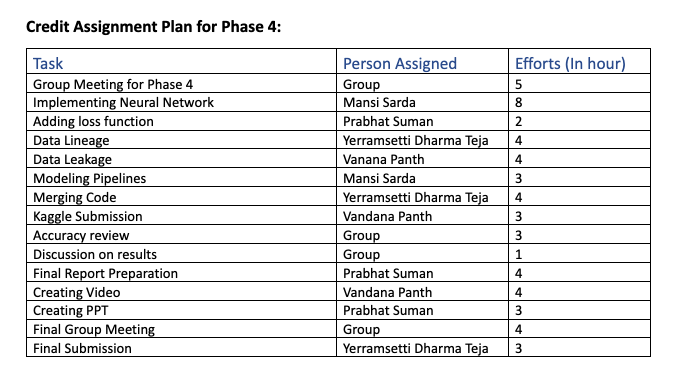
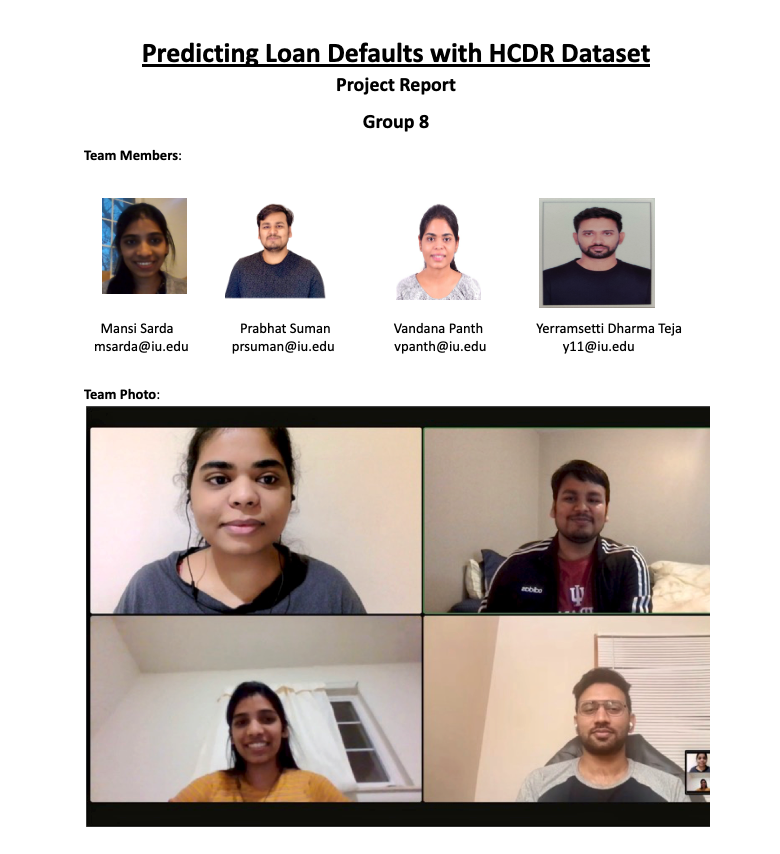

In [ ]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
previous_application.csv            386MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [ ]:
import os
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
DATA_DIR = os.path.join('./ddddd/')
!mkdir DATA_DIR

In [ ]:
!ls -l DATA_DIR

total 0


In [ ]:
! kaggle competitions download home-credit-default-risk -p "DATA_DIR"

403 - Forbidden


In [ ]:
!pwd 

/root/shared/Dropbox/Projects/Courses/DataScienceAtScale/Src/I526_AML_Dev_CADG/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [ ]:
!ls -l $DATA_DIR

total 705536
-rw-r--r-- 1 root root 721616255 Nov  9 02:19 home-credit-default-risk.zip


In [ ]:
#!rm -r  DATA_DIR

### Imports

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

### Application train

In [ ]:
ls -l ../../../Data/home-credit-default-risk/application_train.csv

-rw-r--r--  1 vpanth  staff  166133370 Dec 11  2019 ../../../Data/home-credit-default-risk/application_train.csv


In [ ]:
!mkdir DATA_DIR

In [141]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'

#DATA_DIR=f"/content/DATA_DIR"
DATA_DIR=f"/Users/vpanth/Documents/Fall22/Applied ML/I526_AML_Student/Data/home-credit-default-risk/"
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0.0000                    0.0000   
1                     0.0000                    0.0000   
2                     0.0000                    0.0000   
3                        NaN                       NaN   
4                     0.0000                    0.0000   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                      0.0000                     0.0000   
1                      0.0000                     0.0000   
2                      0.0000                     0.0000   
3                         NaN                        NaN   
4                      0.0000                     0.0000   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                     0.0000                      1.0000  
1                     0.0000                      0.0000  
2                     0.0000                      0.0000  
3                        NaN                         NaN  
4                     0.0000                      0.0000  

[5 rows x 122 columns]

(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [142]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0       135000.0000  568800.0000   20560.5000      450000.0000   
1             0        99000.0000  222768.0000   17370.0000      180000.0000   
2             0       202500.0000  663264.0000   69777.0000      630000.0000   
3             2       315000.0000 1575000.0000   49018.5000     1575000.0000   
4             1       180000.0000  625500.0000   32067.0000      625500.0000   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0.0000                     0.0000   
1                     0.0000                     0.0000   
2                     0.0000                     0.0000   
3                     0.0000                     0.0000   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                      0.0000                     0.0000   
1                      0.0000                     0.0000   
2                      0.0000                     0.0000   
3                      0.0000                     0.0000   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                     0.0000                      0.0000  
1                     0.0000                      3.0000  
2                     1.0000                      4.0000  
3                     0.0000                      3.0000  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [143]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0.0000                    0.0000   
1                     0.0000                    0.0000   
2                     0.0000                    0.0000   
3                        NaN                       NaN   
4                     0.0000                    0.0000   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                      0.0000                     0.0000   
1                      0.0000                     0.0000   
2                      0.0000                     0.0000   
3                         NaN                        NaN   
4                      0.0000                     0.0000   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                     0.0000                      1.0000  
1                     0.0000                      0.0000  
2                     0.0000                      0.0000  
3                        NaN                         NaN  
4                     0.0000                      0.0000  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0       135000.0000  568800.0000   20560.5000      450000.0000   
1             0        99000.0000  222768.0000   17370.0000      180000.0000   
2             0       202500.0000  663264.0000   69777.0000      630000.0000   
3             2       315000.0000 1575000.0000   49018.5000     1575000.0000   
4             1       180000.0000  625500.0000   32067.0000      625500.0000   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0.0000                     0.0000   
1                     0.0000                     0.0000   
2                     0.0000                     0.0000   
3                     0.0000                     0.0000   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                      0.0000                     0.0000   
1                      0.0000                     0.0000   
2                      0.0000                     0.0000   
3                      0.0000                     0.0000   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                     0.0000                      0.0000  
1                     0.0000                      3.0000  
2                     1.0000                      4.0000  
3                     0.0000                      3.0000  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0            -153.0000          -153.0000   
1                   0            1075.0000                NaN   
2                   0             528.0000                NaN   
3                   0                  NaN                NaN   
4                   0            1197.0000                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0      91323.0000   
1                     NaN                   0     225000.0000   
2                     NaN                   0     464323.5000   
3                     NaN                   0      90000.0000   
4              77674.5000                   0    2700000.0000   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0               0.0000                   NaN                  0.0000   
1          171342.0000                   NaN                  0.0000   
2                  NaN                   NaN                  0.0000   
3                  NaN                   NaN                  0.0000   
4                  NaN                   NaN                  0.0000   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6      56.9700   
1     2582071      363914              -1   63975.5550   
2     1740877      371185              -7   31815.2250   
3     1389973      337855              -4  236572.1100   
4     1891521      126868              -1  453919.4550   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                    0.0000              877.5000   
1                    45000                 2250.0000             2250.0000   
2                   450000                    0.0000                0.0000   
3                   225000                 2250.0000             2250.0000   
4                   450000                    0.0000            11547.0000   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                      0.0000                  877.5000   
1                      0.0000                    0.0000   
2                      0.0000                    0.0000   
3                      0.0000                    0.0000   
4                      0.0000                11547.0000   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                1700.3250  ...         0.0000                0.0000   
1                2250.0000  ...     64875.5550            64875.5550   
2                2250.0000  ...     31460.0850            31460.0850   
3               11795.7600  ...    233048.9700           233048.9700   
4               22924.8900  ...    453919.4550           453919.4550   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                    0.0000                     1                      0.0000   
1                    1.0000                     1                      0.0000   
2                    0.0000                     0                      0.0000   
3                    1.0000                     1                      0.0000   
4                    0.0000                     1                      0.0000   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                    1.0000                    35.0000                Active   
1                    0.0000                    69.0000                Active   
2                    0.0000                    30.0000                Active   
3                    0.0000                    10.0000                Active   
4                    1.0000                   101.0000                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                  1.0000                      6   
1     1330831      151639                  0.0000                     34   
2     2085231      193053                  2.0000                      1   
3     2452527      199697                  1.0000                      3   
4     2714724      167756                  1.0000                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0       -1180.0000          -1187.0000       6948.3600    6948.3600  
1       -2156.0000          -2156.0000       1716.5250    1716.5250  
2         -63.0000            -63.0000      25425.0000   25425.0000  
3       -2418.0000          -2426.0000      24350.1300   24350.1300  
4       -1383.0000          -1366.0000       2165.0400    2160.5850

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300       17145.0000   
1     2802425      108129         Cash loans   25188.6150      607500.0000   
2     2523466      122040         Cash loans   15060.7350      112500.0000   
3     2819243      176158         Cash loans   47041.3350      450000.0000   
4     1784265      202054         Cash loans   31924.3950      337500.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0000            0.0000       17145.0000                   SATURDAY   
1 679671.0000               NaN      607500.0000                   THURSDAY   
2 136444.5000               NaN      112500.0000                    TUESDAY   
3 470790.0000               NaN      450000.0000                     MONDAY   
4 404055.0000               NaN      337500.0000                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity      12.0000   
1                       11  ...                  XNA      36.0000   
2                       11  ...                  XNA      12.0000   
3                        7  ...                  XNA      12.0000   
4                        9  ...                  XNA      24.0000   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest         365243.0000   
1        low_action          Cash X-Sell: low         365243.0000   
2              high         Cash X-Sell: high         365243.0000   
3            middle       Cash X-Sell: middle         365243.0000   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0       -42.0000                  300.0000       -42.0000         -37.0000   
1      -134.0000                  916.0000    365243.0000      365243.0000   
2      -271.0000                   59.0000    365243.0000      365243.0000   
3      -482.0000                 -152.0000      -182.0000        -177.0000   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                    0.0000  
1                    1.0000  
2                    1.0000  
3                    1.0000  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31         48.0000   
1     1715348      367990             -33         36.0000   
2     1784872      397406             -32         12.0000   
3     1903291      269225             -35         48.0000   
4     2341044      334279             -35         36.0000   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                45.0000               Active       0           0  
1                35.0000               Active       0           0  
2                 9.0000               Active       0           0  
3                42.0000               Active       0           0  
4                35.0000               Active       0           0

CPU times: user 53.8 s, sys: 12.4 s, total: 1min 6s
Wall time: 1min 15s


In [144]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


                      row_count column_count
application_train        307511          122
application_test          48744          121
bureau                  1716428           17
bureau_balance         27299925            3
credit_card_balance     3840312           23
installments_payments  13605401            8
previous_application    1670214           37
POS_CASH_balance       10001358            8


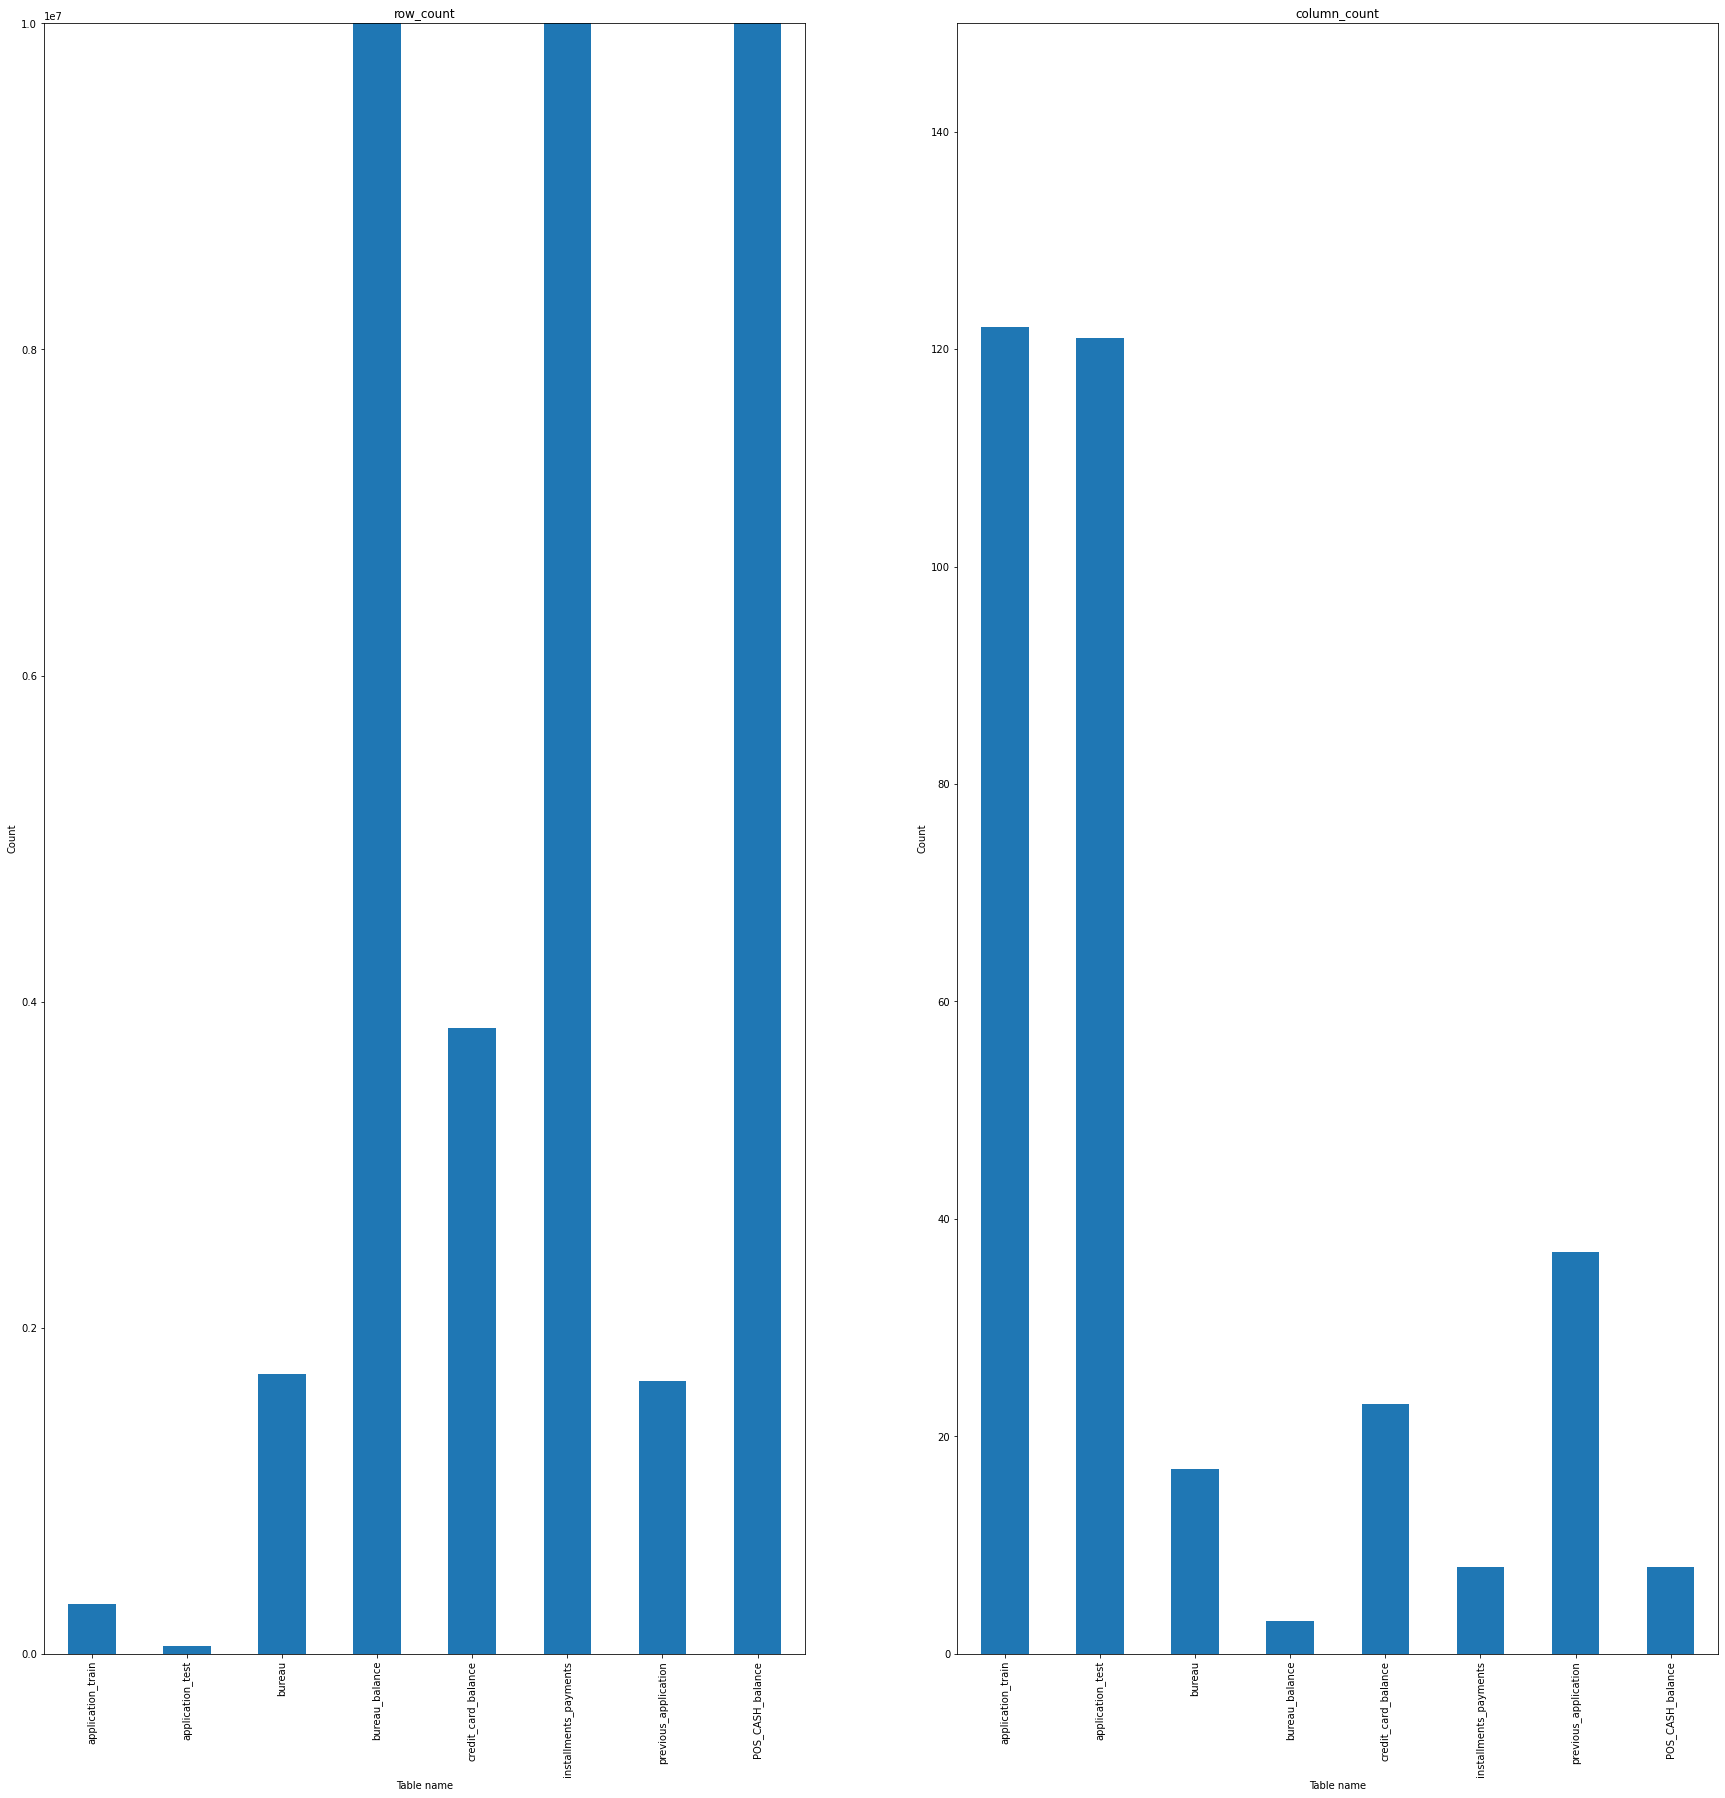

In [57]:
#Representing the number of rows and columns in each dataset
pd.options.display.float_format = '{:.4f}'.format
ds_info = pd.DataFrame(columns=['row_count','column_count'],index=ds_names)
for ds_name in ds_names:
    ds_info['row_count'][ds_name] = datasets[ds_name].shape[0]
    ds_info['column_count'][ds_name] = datasets[ds_name].shape[1]
print(ds_info)
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ylim = [10002000,150]

axes = [ax1,ax2]
for i in range(len(ds_info.columns)):
    ds_info.iloc[:,i].plot(kind = 'bar',ax=axes[i],title = ds_info.columns[i],xlabel = 'Table name',ylabel='Count',ylim=(0,ylim[i]))

## Observation
'bureau_balance' has the highest number of rows (over 27 million rows), however it has the least number of features (3).
'install_payments' has the second highest number of rows (over 13 million).
The application dataset has the highest number of features (121) and 'previos_applications has the second highest number of features (37).

# Exploratory Data Analysis

The helper EDA function is created to display the count of null values of each column in the dataset, and the data type of each feature

In [58]:
#Helper Function to display statistics of the datasets
def eda(df, df_name):
    print(datasets[df_name].info(verbose=True, null_counts=True ))
    print("-----"*15)
    print(f"Shape of the df {df_name} is {df.shape} \n")
    print("-----"*15)
    print(f"Description of the df continued for {df_name}:\n")
    print("-----"*15)
    print("Data type value counts: \n",df.dtypes.value_counts())
    print("\nReturn number of unique elements in the object. \n")
    print(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))


## Summary Statistics
(Null count value, Data Types, Shape of the datasets)

In [59]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [60]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
count 307511.0000 307511.0000   307511.0000       307511.0000  307511.0000   
mean  278180.5186      0.0807        0.4171       168797.9193  599025.9997   
std   102790.1753      0.2724        0.7221       237123.1463  402490.7770   
min   100002.0000      0.0000        0.0000        25650.0000   45000.0000   
25%   189145.5000      0.0000        0.0000       112500.0000  270000.0000   
50%   278202.0000      0.0000        0.0000       147150.0000  513531.0000   
75%   367142.5000      0.0000        1.0000       202500.0000  808650.0000   
max   456255.0000      1.0000       19.0000    117000000.0000 4050000.0000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count  307499.0000      307233.0000                 307511.0000 307511.0000   
mean    27108.5739      538396.2074                      0.0209 -16036.9951   
std     14493.7373      369446.4605                      0.0138   4363.9886   
min      1615.5000       40500.0000                      0.0003 -25229.0000   
25%     16524.0000      238500.0000                      0.0100 -19682.0000   
50%     24903.0000      450000.0000                      0.0188 -15750.0000   
75%     34596.0000      679500.0000                      0.0287 -12413.0000   
max    258025.5000     4050000.0000                      0.0725  -7489.0000   

       DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count    307511.0000  ...       307511.0000       307511.0000   
mean      63815.0459  ...            0.0081            0.0006   
std      141275.7665  ...            0.0898            0.0244   
min      -17912.0000  ...            0.0000            0.0000   
25%       -2760.0000  ...            0.0000            0.0000   
50%       -1213.0000  ...            0.0000            0.0000   
75%        -289.0000  ...            0.0000            0.0000   
max      365243.0000  ...            1.0000            1.0000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count       307511.0000       307511.0000                 265992.0000   
mean             0.0005            0.0003                      0.0064   
std              0.0225            0.0183                      0.0838   
min              0.0000            0.0000                      0.0000   
25%              0.0000            0.0000                      0.0000   
50%              0.0000            0.0000                      0.0000   
75%              0.0000            0.0000                      0.0000   
max              1.0000            1.0000                      4.0000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                265992.0000                 265992.0000   
mean                      0.0070                      0.0344   
std                       0.1108                      0.2047   
min                       0.0000                      0.0000   
25%                       0.0000                      0.0000   
50%                       0.0000                      0.0000   
75%                       0.0000                      0.0000   
max                       9.0000                      8.0000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                265992.0000                265992.0000   
mean                      0.2674                     0.2655   
std                       0.9160                     0.7941   
min                       0.0000                     0.0000   
25%                       0.0000                     0.0000   
50%                       0.0000                     0.0000   
75%                       0.0000                     0.0000   
max                      27.0000                   261.0000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                 265992.0000  
mean                       1.9000  
std                        1.8693  
min                        0.0000  
25%                    

In [61]:
datasets["application_test"].describe() #numerical only features

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
count  48744.0000    48744.0000        48744.0000   48744.0000   48720.0000   
mean  277796.6763        0.3971       178431.8059  516740.4356   29426.2402   
std   103169.5473        0.7090       101522.5915  365397.0042   16016.3683   
min   100001.0000        0.0000        26941.5000   45000.0000    2295.0000   
25%   188557.7500        0.0000       112500.0000  260640.0000   17973.0000   
50%   277549.0000        0.0000       157500.0000  450000.0000   26199.0000   
75%   367555.5000        1.0000       225000.0000  675000.0000   37390.5000   
max   456250.0000       20.0000      4410000.0000 2245500.0000  180576.0000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count       48744.0000                  48744.0000  48744.0000     48744.0000   
mean       462618.8405                      0.0212 -16068.0846     67485.3663   
std        336710.2150                      0.0144   4325.9004    144348.5071   
min         45000.0000                      0.0003 -25195.0000    -17463.0000   
25%        225000.0000                      0.0100 -19637.0000     -2910.0000   
50%        396000.0000                      0.0188 -15785.0000     -1293.0000   
75%        630000.0000                      0.0287 -12496.0000      -296.0000   
max       2245500.0000                      0.0725  -7338.0000    365243.0000   

       DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count         48744.0000  ...        48744.0000        48744.0000   
mean          -4967.6527  ...            0.0016            0.0000   
std            3552.6120  ...            0.0395            0.0000   
min          -23722.0000  ...            0.0000            0.0000   
25%           -7459.2500  ...            0.0000            0.0000   
50%           -4490.0000  ...            0.0000            0.0000   
75%           -1901.0000  ...            0.0000            0.0000   
max               0.0000  ...            1.0000            0.0000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count        48744.0000        48744.0000                  42695.0000   
mean             0.0000            0.0000                      0.0021   
std              0.0000            0.0000                      0.0464   
min              0.0000            0.0000                      0.0000   
25%              0.0000            0.0000                      0.0000   
50%              0.0000            0.0000                      0.0000   
75%              0.0000            0.0000                      0.0000   
max              0.0000            0.0000                      2.0000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                 42695.0000                  42695.0000   
mean                      0.0018                      0.0028   
std                       0.0461                      0.0540   
min                       0.0000                      0.0000   
25%                       0.0000                      0.0000   
50%                       0.0000                      0.0000   
75%                       0.0000                      0.0000   
max                       2.0000                      2.0000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                 42695.0000                 42695.0000   
mean                      0.0093                     0.5469   
std                       0.1109                     0.6933   
min                       0.0000                     0.0000   
25%                       0.0000                     0.0000   
50%                       0.0000                     0.0000   
75%                       0.0000                     1.0000   
max                       6.0000                     7.0000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                  42695.0000  
mean                       1.9838  
std                        1.838

In [62]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR      TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count  307511.0000 307511.0000             307511      307511       307511   
unique         NaN         NaN                  2           3            2   
top            NaN         NaN         Cash loans           F            N   
freq           NaN         NaN             278232      202448       202924   
mean   278180.5186      0.0807                NaN         NaN          NaN   
std    102790.1753      0.2724                NaN         NaN          NaN   
min    100002.0000      0.0000                NaN         NaN          NaN   
25%    189145.5000      0.0000                NaN         NaN          NaN   
50%    278202.0000      0.0000                NaN         NaN          NaN   
75%    367142.5000      0.0000                NaN         NaN          NaN   
max    456255.0000      1.0000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
count           307511   307511.0000       307511.0000  307511.0000   
unique               2           NaN               NaN          NaN   
top                  Y           NaN               NaN          NaN   
freq            213312           NaN               NaN          NaN   
mean               NaN        0.4171       168797.9193  599025.9997   
std                NaN        0.7221       237123.1463  402490.7770   
min                NaN        0.0000        25650.0000   45000.0000   
25%                NaN        0.0000       112500.0000  270000.0000   
50%                NaN        0.0000       147150.0000  513531.0000   
75%                NaN        1.0000       202500.0000  808650.0000   
max                NaN       19.0000    117000000.0000 4050000.0000   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
count   307499.0000  ...       307511.0000      307511.0000      307511.0000   
unique          NaN  ...               NaN              NaN              NaN   
top             NaN  ...               NaN              NaN              NaN   
freq            NaN  ...               NaN              NaN              NaN   
mean     27108.5739  ...            0.0081           0.0006           0.0005   
std      14493.7373  ...            0.0898           0.0244           0.0225   
min       1615.5000  ...            0.0000           0.0000           0.0000   
25%      16524.0000  ...            0.0000           0.0000           0.0000   
50%      24903.0000  ...            0.0000           0.0000           0.0000   
75%      34596.0000  ...            0.0000           0.0000           0.0000   
max     258025.5000  ...            1.0000           1.0000           1.0000   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
count       307511.0000                265992.0000               265992.0000   
unique              NaN                        NaN                       NaN   
top                 NaN                        NaN                       NaN   
freq                NaN                        NaN                       NaN   
mean             0.0003                     0.0064                    0.0070   
std              0.0183                     0.0838                    0.1108   
min              0.0000                     0.0000                    0.0000   
25%              0.0000                     0.0000                    0.0000   
50%              0.0000                     0.0000                    0.0000   
75%              0.0000                     0.0000                    0.0000   
max              1.0000                     4.0000                    9.0000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                  265992.0000                265992.0000   
unique                         NaN                        NaN   
top                            NaN                        NaN   
freq                           NaN  

In [63]:
eda(datasets['application_train'],'application_train')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [64]:
eda(datasets['bureau'],'bureau')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

In [ ]:
eda(datasets['bureau_balance'],'bureau_balance')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   SK_ID_BUREAU    27299925 non-null  int64 
 1   MONTHS_BALANCE  27299925 non-null  int64 
 2   STATUS          27299925 non-null  object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None
---------------------------------------------------------------------------
Shape of the df bureau_balance is (27299925, 3) 

---------------------------------------------------------------------------
Description of the df continued for bureau_balance:

---------------------------------------------------------------------------
Data type value counts: 
 int64     2
object    1
dtype: int64

Return number of unique elements in the object. 

STATUS    8
dtype: int64


In [65]:
eda(datasets['previous_application'],'previous_application')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
eda(datasets['credit_card_balance'],'credit_card_balance')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  3840312 non-null  int64  
 1   SK_ID_CURR                  3840312 non-null  int64  
 2   MONTHS_BALANCE              3840312 non-null  int64  
 3   AMT_BALANCE                 3840312 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     3840312 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    3090496 non-null  float64
 6   AMT_DRAWINGS_CURRENT        3840312 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  3090496 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    3090496 non-null  float64
 9   AMT_INST_MIN_REGULARITY     3535076 non-null  float64
 10  AMT_PAYMENT_CURRENT         3072324 non-null  float64
 11  AMT_PAYMENT_TOTAL_CURRENT   3840312 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    3840312 non-null  float64
 1

In [ ]:
eda(datasets['installments_payments'],'installments_payments')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   SK_ID_PREV              13605401 non-null  int64  
 1   SK_ID_CURR              13605401 non-null  int64  
 2   NUM_INSTALMENT_VERSION  13605401 non-null  float64
 3   NUM_INSTALMENT_NUMBER   13605401 non-null  int64  
 4   DAYS_INSTALMENT         13605401 non-null  float64
 5   DAYS_ENTRY_PAYMENT      13602496 non-null  float64
 6   AMT_INSTALMENT          13605401 non-null  float64
 7   AMT_PAYMENT             13602496 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None
---------------------------------------------------------------------------
Shape of the df installments_payments is (13605401, 8) 

---------------------------------------------------------------------------
Description of the df continued for installments_payments:



## Missing data for application train

In [ ]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI           69.8700               214865
COMMONAREA_AVG            69.8700               214865
COMMONAREA_MODE           69.8700               214865
NONLIVINGAPARTMENTS_MODE  69.4300               213514
NONLIVINGAPARTMENTS_AVG   69.4300               213514
NONLIVINGAPARTMENTS_MEDI  69.4300               213514
FONDKAPREMONT_MODE        68.3900               210295
LIVINGAPARTMENTS_MODE     68.3500               210199
LIVINGAPARTMENTS_AVG      68.3500               210199
LIVINGAPARTMENTS_MEDI     68.3500               210199
FLOORSMIN_AVG             67.8500               208642
FLOORSMIN_MODE            67.8500               208642
FLOORSMIN_MEDI            67.8500               208642
YEARS_BUILD_MEDI          66.5000               204488
YEARS_BUILD_MODE          66.5000               204488
YEARS_BUILD_AVG           66.5000               204488
OWN_CAR_AGE               65.9900               202929
LANDAREA_MEDI             59.3800               182590
LANDAREA_MODE             59.3800               182590
LANDAREA_AVG              59.3800               182590

In [ ]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_test_data.head(20)

Percent  Test Missing Count
COMMONAREA_AVG            68.7200               33495
COMMONAREA_MODE           68.7200               33495
COMMONAREA_MEDI           68.7200               33495
NONLIVINGAPARTMENTS_AVG   68.4100               33347
NONLIVINGAPARTMENTS_MODE  68.4100               33347
NONLIVINGAPARTMENTS_MEDI  68.4100               33347
FONDKAPREMONT_MODE        67.2800               32797
LIVINGAPARTMENTS_AVG      67.2500               32780
LIVINGAPARTMENTS_MODE     67.2500               32780
LIVINGAPARTMENTS_MEDI     67.2500               32780
FLOORSMIN_MEDI            66.6100               32466
FLOORSMIN_AVG             66.6100               32466
FLOORSMIN_MODE            66.6100               32466
OWN_CAR_AGE               66.2900               32312
YEARS_BUILD_AVG           65.2800               31818
YEARS_BUILD_MEDI          65.2800               31818
YEARS_BUILD_MODE          65.2800               31818
LANDAREA_MEDI             57.9600               28254
LANDAREA_AVG              57.9600               28254
LANDAREA_MODE             57.9600               28254

In [ ]:
percent = (datasets["previous_application"].isnull().sum()/datasets["previous_application"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["previous_application"].isna().sum().sort_values(ascending = False)
missing_prevApp  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Previous Applicantion Missing Count"])
missing_prevApp.head(10)

Percent  Previous Applicantion Missing Count
RATE_INTEREST_PRIVILEGED   99.6400                              1664263
RATE_INTEREST_PRIMARY      99.6400                              1664263
AMT_DOWN_PAYMENT           53.6400                               895844
RATE_DOWN_PAYMENT          53.6400                               895844
NAME_TYPE_SUITE            49.1200                               820405
NFLAG_INSURED_ON_APPROVAL  40.3000                               673065
DAYS_TERMINATION           40.3000                               673065
DAYS_LAST_DUE              40.3000                               673065
DAYS_LAST_DUE_1ST_VERSION  40.3000                               673065
DAYS_FIRST_DUE             40.3000                               673065

In [ ]:
percent = (datasets["bureau"].isnull().sum()/datasets["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau"].isna().sum().sort_values(ascending = False)
missing_bureau  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Bureau Missing Count"])
missing_bureau.head(10)

Percent  Bureau Missing Count
AMT_ANNUITY             71.4700               1226791
AMT_CREDIT_MAX_OVERDUE  65.5100               1124488
DAYS_ENDDATE_FACT       36.9200                633653
AMT_CREDIT_SUM_LIMIT    34.4800                591780
AMT_CREDIT_SUM_DEBT     15.0100                257669
DAYS_CREDIT_ENDDATE      6.1500                105553
AMT_CREDIT_SUM           0.0000                    13
CREDIT_ACTIVE            0.0000                     0
CREDIT_CURRENCY          0.0000                     0
DAYS_CREDIT              0.0000                     0

In [ ]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_creditcard  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Credit Card Balance Missing Count"])
missing_creditcard.head(20)

Percent  Credit Card Balance Missing Count
AMT_PAYMENT_CURRENT         20.0000                             767988
AMT_DRAWINGS_ATM_CURRENT    19.5200                             749816
CNT_DRAWINGS_POS_CURRENT    19.5200                             749816
AMT_DRAWINGS_OTHER_CURRENT  19.5200                             749816
AMT_DRAWINGS_POS_CURRENT    19.5200                             749816
CNT_DRAWINGS_OTHER_CURRENT  19.5200                             749816
CNT_DRAWINGS_ATM_CURRENT    19.5200                             749816
CNT_INSTALMENT_MATURE_CUM    7.9500                             305236
AMT_INST_MIN_REGULARITY      7.9500                             305236
SK_ID_PREV                   0.0000                                  0
AMT_TOTAL_RECEIVABLE         0.0000                                  0
SK_DPD                       0.0000                                  0
NAME_CONTRACT_STATUS         0.0000                                  0
CNT_DRAWINGS_CURRENT         0.0000                                  0
AMT_PAYMENT_TOTAL_CURRENT    0.0000                                  0
AMT_RECIVABLE                0.0000                                  0
AMT_RECEIVABLE_PRINCIPAL     0.0000                                  0
SK_ID_CURR                   0.0000                                  0
AMT_DRAWINGS_CURRENT         0.0000                                  0
AMT_CREDIT_LIMIT_ACTUAL      0.0000                                  0

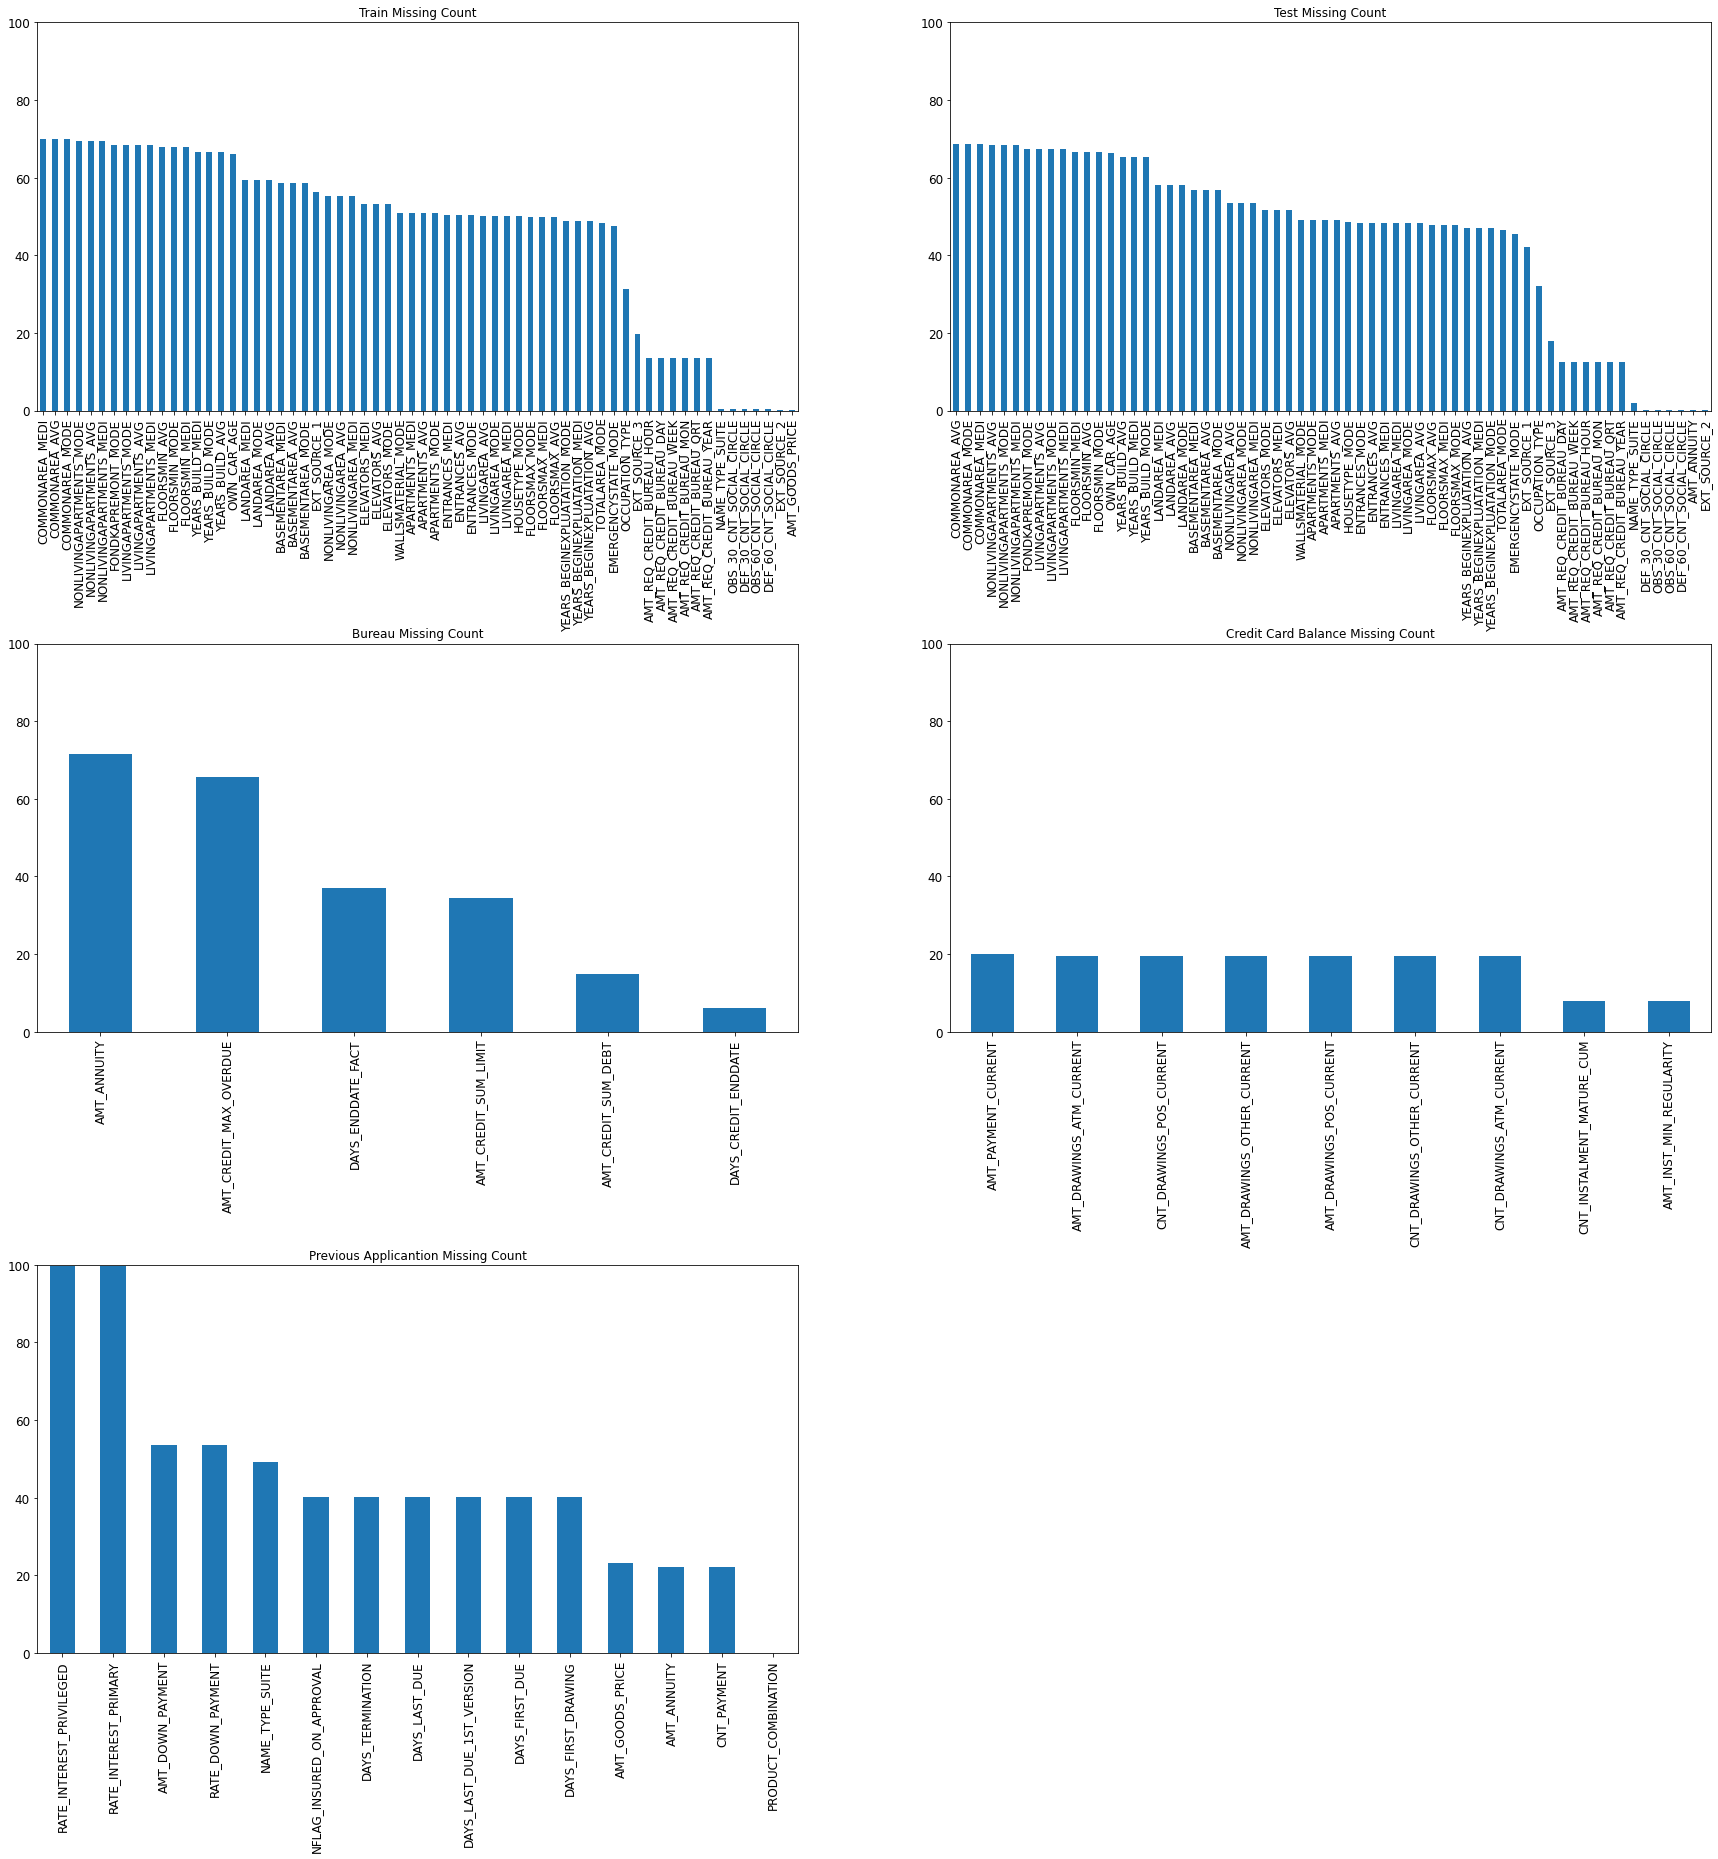

In [ ]:
#Plot to visualize the number of missing features in each table
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)

axes = [ax1,ax2,ax3,ax4,ax5]

df_list = [missing_application_train_data,missing_application_test_data,missing_bureau,missing_creditcard,missing_prevApp]
for i in range(5):
    df = df_list[i]
    df.loc[(df.Percent > 0),'Percent'].plot(kind='bar',ax=axes[i],title=df.columns[1],ylim = (0,100),fontsize=12)
    plt.subplots_adjust(hspace=0.6)
fig.savefig('missing_values.jpg')

## Observation
We see that two of the columns in 'previous_application', 'RATE_INTEREST_PRIVILEGED' and 'RATE_INTEREST_PRIMARY' are over 99% null values, hence it is safe to drop these two features

## Distribution of the target column 

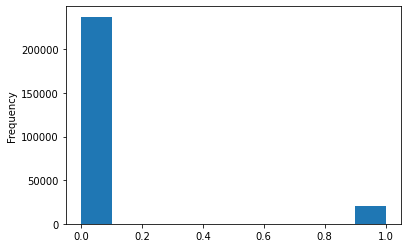

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

datasets["application_train"]['TARGET'].astype(int).plot.hist();

### Identifying Numerical and Categorical Features

In [66]:
#Identifying the numerical and catagorical variables in application table
numerical_features_app = datasets['application_train'].select_dtypes(include = ['int64','float64']).columns
numerical_features_app

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [67]:
#Identifying out catagorical features :
categorical_features_app = datasets['application_train'].select_dtypes(include = ['object']).columns
categorical_features_app

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [68]:
#Graph to plot the number of Numerical and Categorical Data types in each table
dtype_count = pd.DataFrame(index=ds_names,columns=['Categorical','Numerical'])
for ds_name in ds_names:
    categorical_features = datasets[ds_name].select_dtypes(include = ['object']).columns
    numerical_features = datasets[ds_name].select_dtypes(include = ['int64','float64']).columns
    dtype_count['Categorical'][ds_name] = len(categorical_features)
    dtype_count['Numerical'][ds_name] = len(numerical_features)
dtype_count


Categorical Numerical
application_train              16       106
application_test               16       105
bureau                          3        14
bureau_balance                  1         2
credit_card_balance             1        22
installments_payments           0         8
previous_application           16        21
POS_CASH_balance                1         7

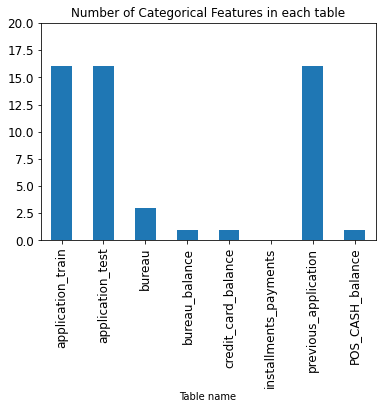

In [ ]:
dtype_count['Categorical'].plot(kind='bar',ylim = (0,20),fontsize=12,title='Number of Categorical Features in each table',xlabel = 'Table name')


### Observation 
We see that the application table and previous_application table have the maximum number (16) of Categorical Features. Hence we will have to use One Hot Encoding in order to pass the data to the learning algorithm 

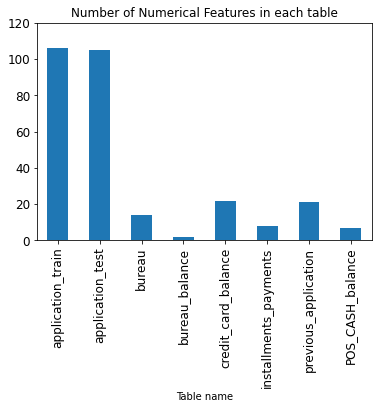

In [ ]:
dtype_count['Numerical'].plot(kind='bar',ylim = (0,120),fontsize=12,title='Number of Numerical Features in each table',xlabel = 'Table name')

### Observation
Application table has the maximum number of numerical features, hence easier to work with

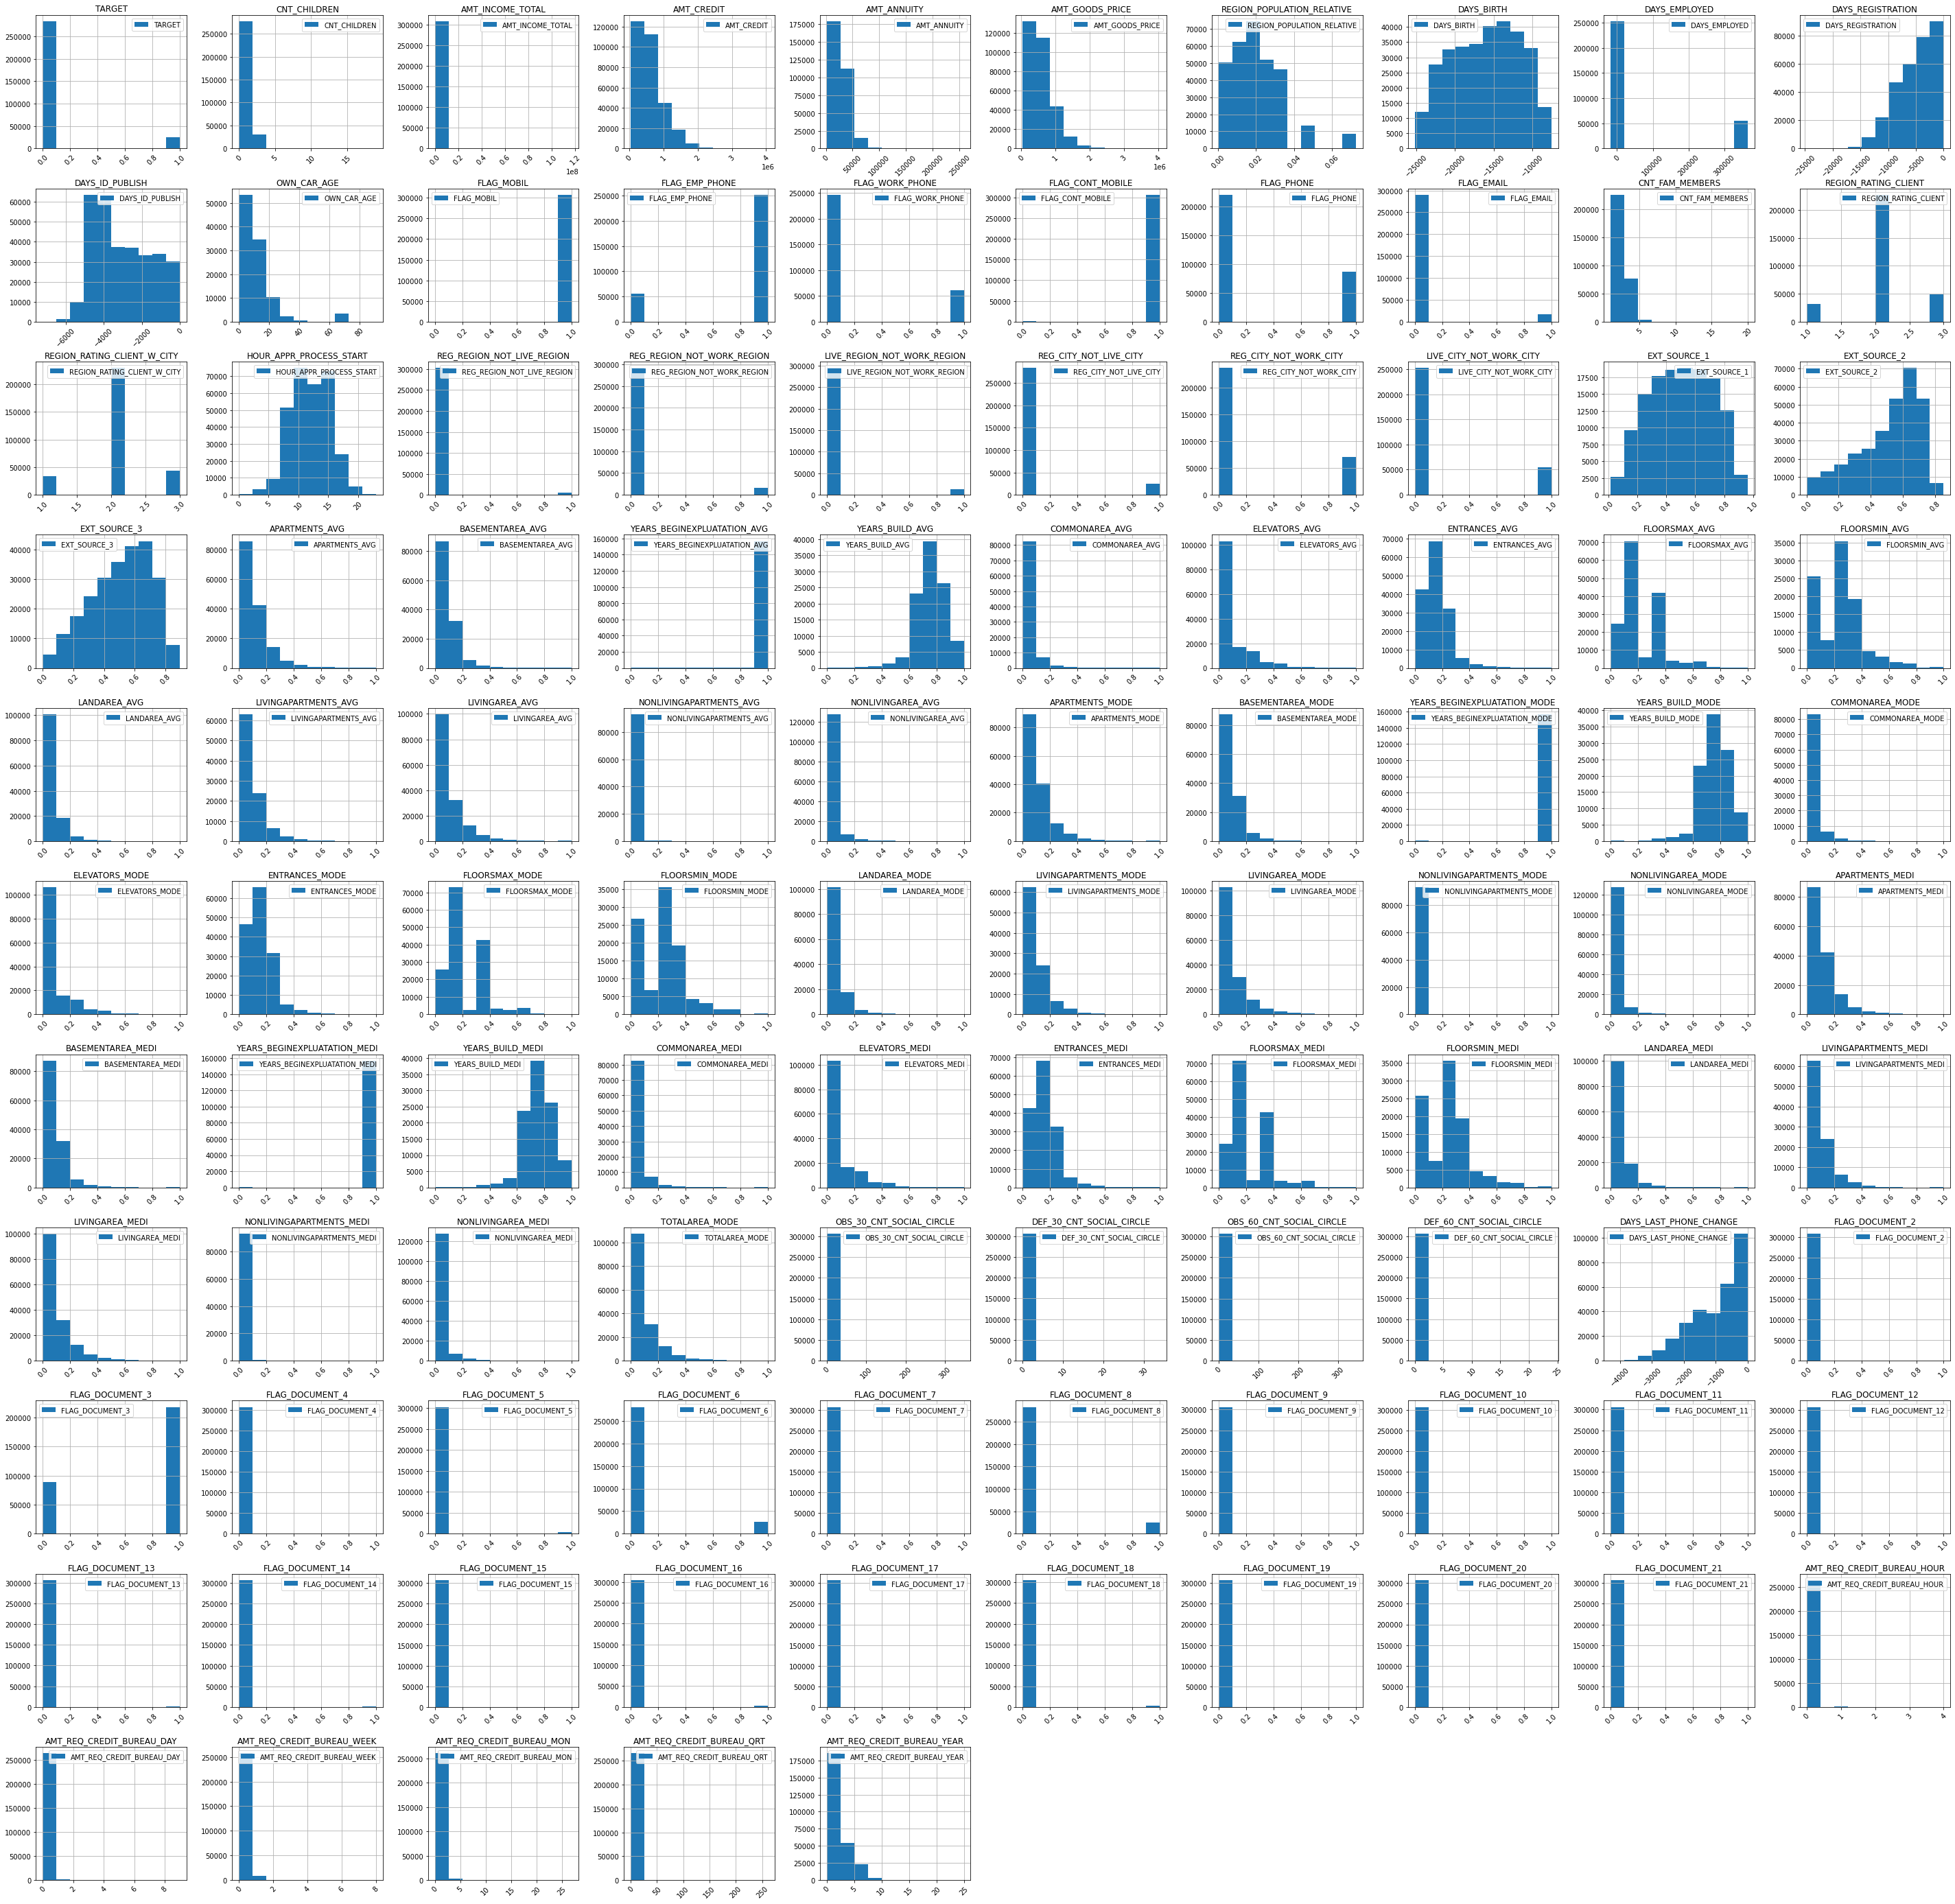

In [14]:
#Plot distribution of each numerical input variable
ax,fig = plt.subplots(21,5,figsize=(50,50))
df_numerical = datasets['application_train'][numerical_features_app]
df_numerical.loc[:, df_numerical.columns != 'SK_ID_CURR'].hist(bins=10, figsize=(50,50),xrot = 45,legend=True,ax=ax)
plt.title('Histogram Plot for numerical variables')
plt.show()

Above grid shows us the Histogram plot of each of the numerical features, from which we can understand the overall distribution of the features , and the range in which the majority of the values fall. We can roughly see where the peaks of the distribution are, whether the distribution is skewed or symmetric, and if there are any outliers.

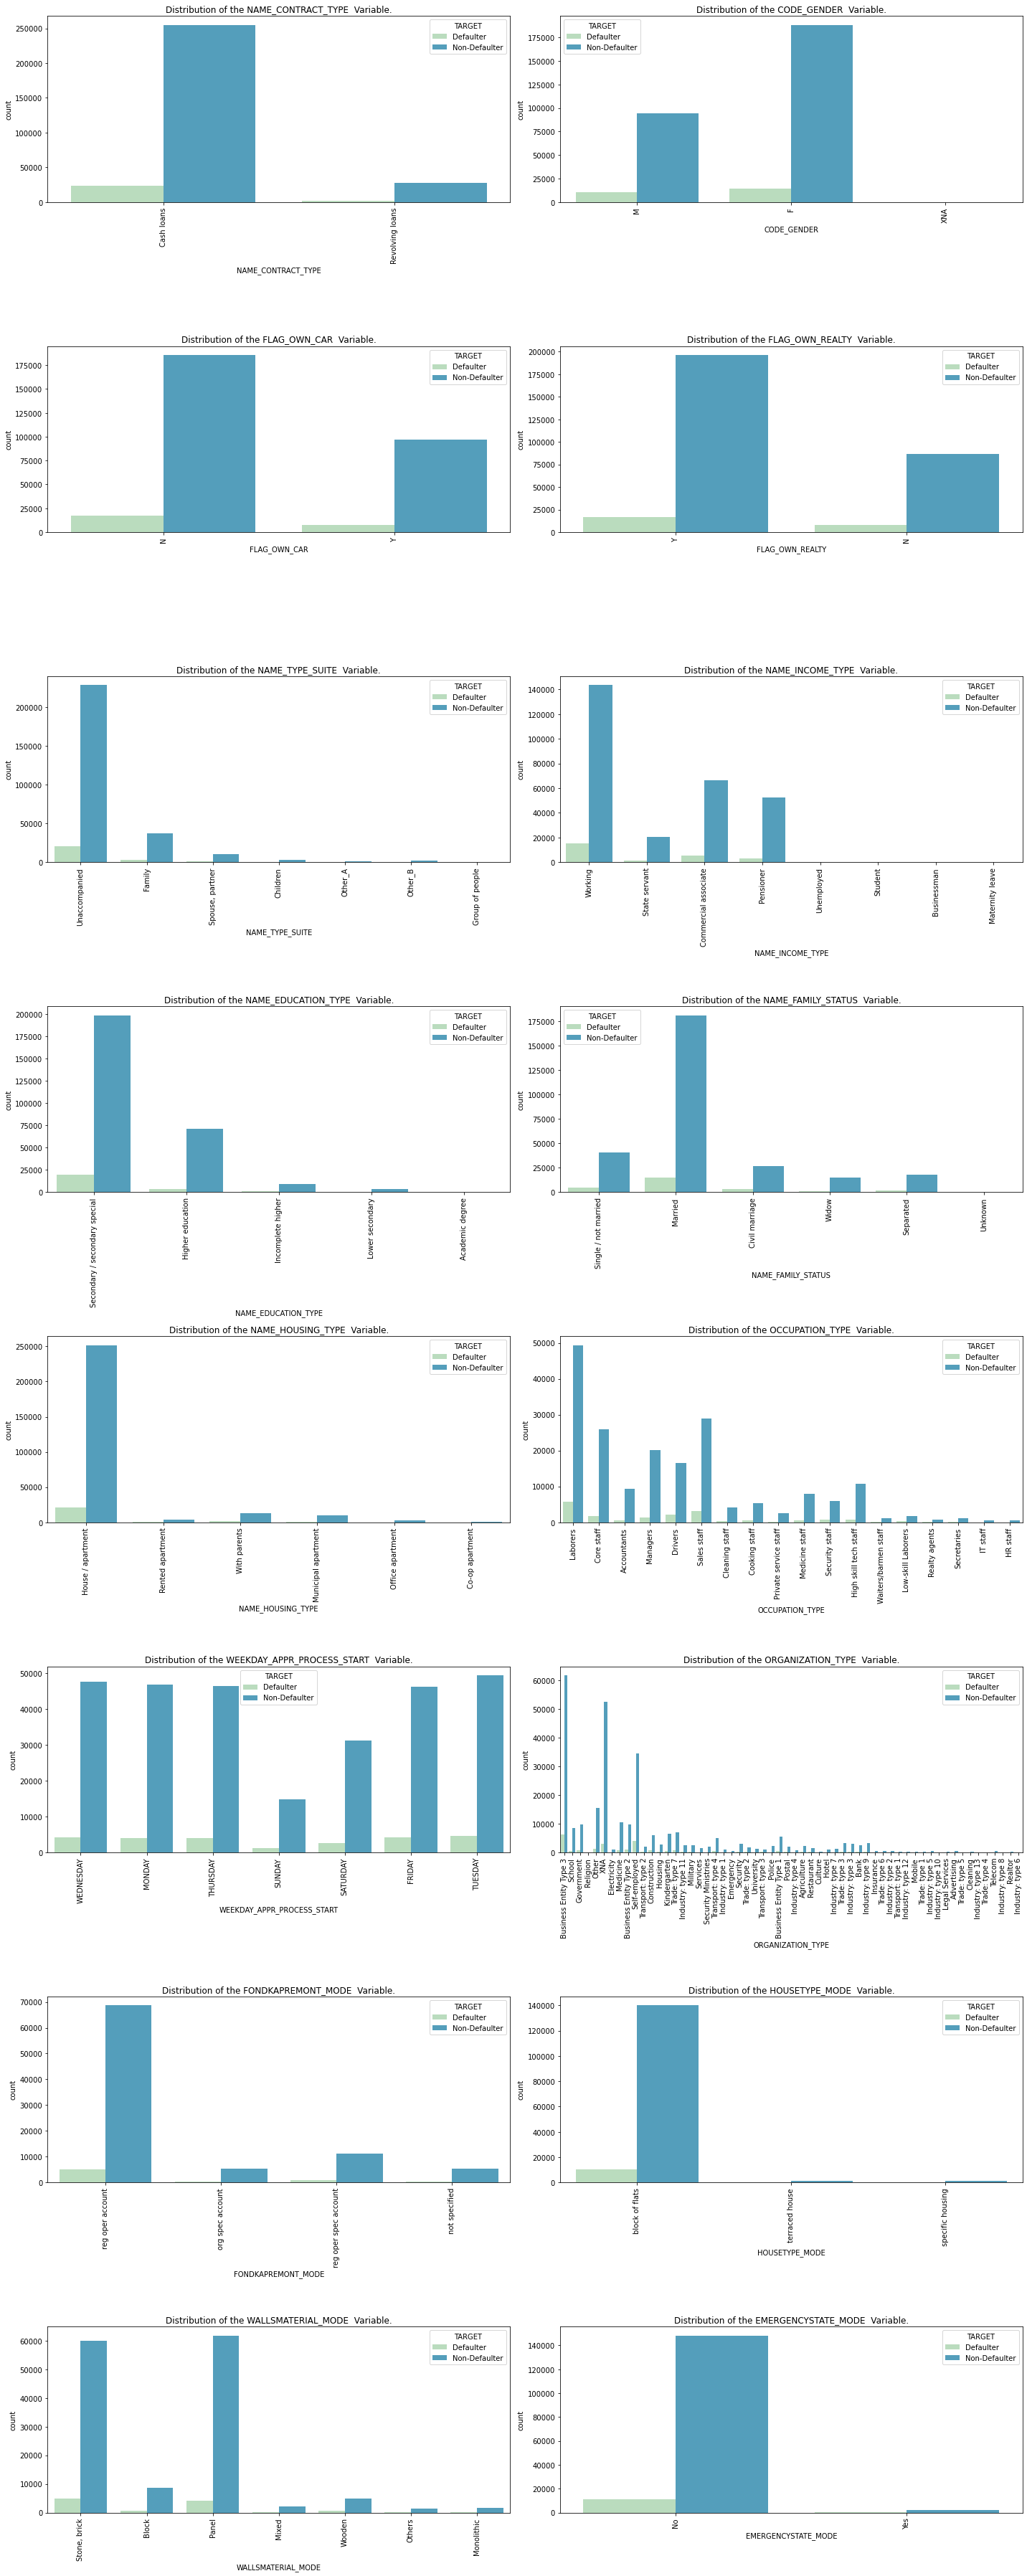

In [15]:
#Distribution of categorical variables 
df_categorical = datasets['application_train'][categorical_features_app]
df_categorical['TARGET'] = datasets['application_train']['TARGET']
df_categorical['TARGET'].replace(0, 'Non-Defaulter',inplace=True)
df_categorical['TARGET'].replace(1, 'Defaulter',inplace=True)

col = 0
fig,ax = plt.subplots(int(len(categorical_features_app)/2),2,figsize=(20,50))
for i in range(8):
    for j in range(2):
        plot = sns.countplot(x=categorical_features_app[col],
                               data=df_categorical, hue='TARGET', ax=ax[i][j],palette='GnBu')
        plot.set_title(f"Distribution of the {categorical_features_app[col]}  Variable.")
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
        plt.subplots_adjust(hspace=0.45)
        col = col + 1
        plt.tight_layout()

Above grid shows us the countplot of each categorical variable, and distribution of the Target variable (Defaulter or Non-Defauler)

In [ ]:
#Pairplot
run = True
if run: 
    df_name = 'application_train'
    num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
                       'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE','REGION_RATING_CLIENT','OWN_CAR_AGE']
    df = datasets[df_name].copy()
    df2 = df[num_attribs]


    # Pair-plot
    df2['TARGET'].replace(0, "No Default", inplace=True)
    df2['TARGET'].replace(1, "Default", inplace=True)    
    num_sns = sns.pairplot(df2, hue="TARGET", markers=["s", "o"])

### Observation
Here we can see that the 'AMT_GOODS_PRICE' and 'AMT_CREDIT' are highly correlated, i.e. the amount of credit taken and the price of the goods for which the credit has been taken habe almost a linear correlation

## Correlation Analysis

In [145]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3               0.0443
REG_CITY_NOT_LIVE_CITY        0.0444
FLAG_EMP_PHONE                0.0460
REG_CITY_NOT_WORK_CITY        0.0510
DAYS_ID_PUBLISH               0.0515
DAYS_LAST_PHONE_CHANGE        0.0552
REGION_RATING_CLIENT          0.0589
REGION_RATING_CLIENT_W_CITY   0.0609
DAYS_BIRTH                    0.0782
TARGET                        1.0000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.1789
EXT_SOURCE_2                 -0.1605
EXT_SOURCE_1                 -0.1553
DAYS_EMPLOYED                -0.0449
FLOORSMAX_AVG                -0.0440
FLOORSMAX_MEDI               -0.0438
FLOORSMAX_MODE               -0.0432
AMT_GOODS_PRICE              -0.0396
REGION_POPULATION_RELATIVE   -0.0372
ELEVATORS_AVG                -0.0342
Name: TARGET, dtype: float64


In [146]:
pos_corr = correlations.tail(10).index.values
neg_corr = correlations.head(10).index.values

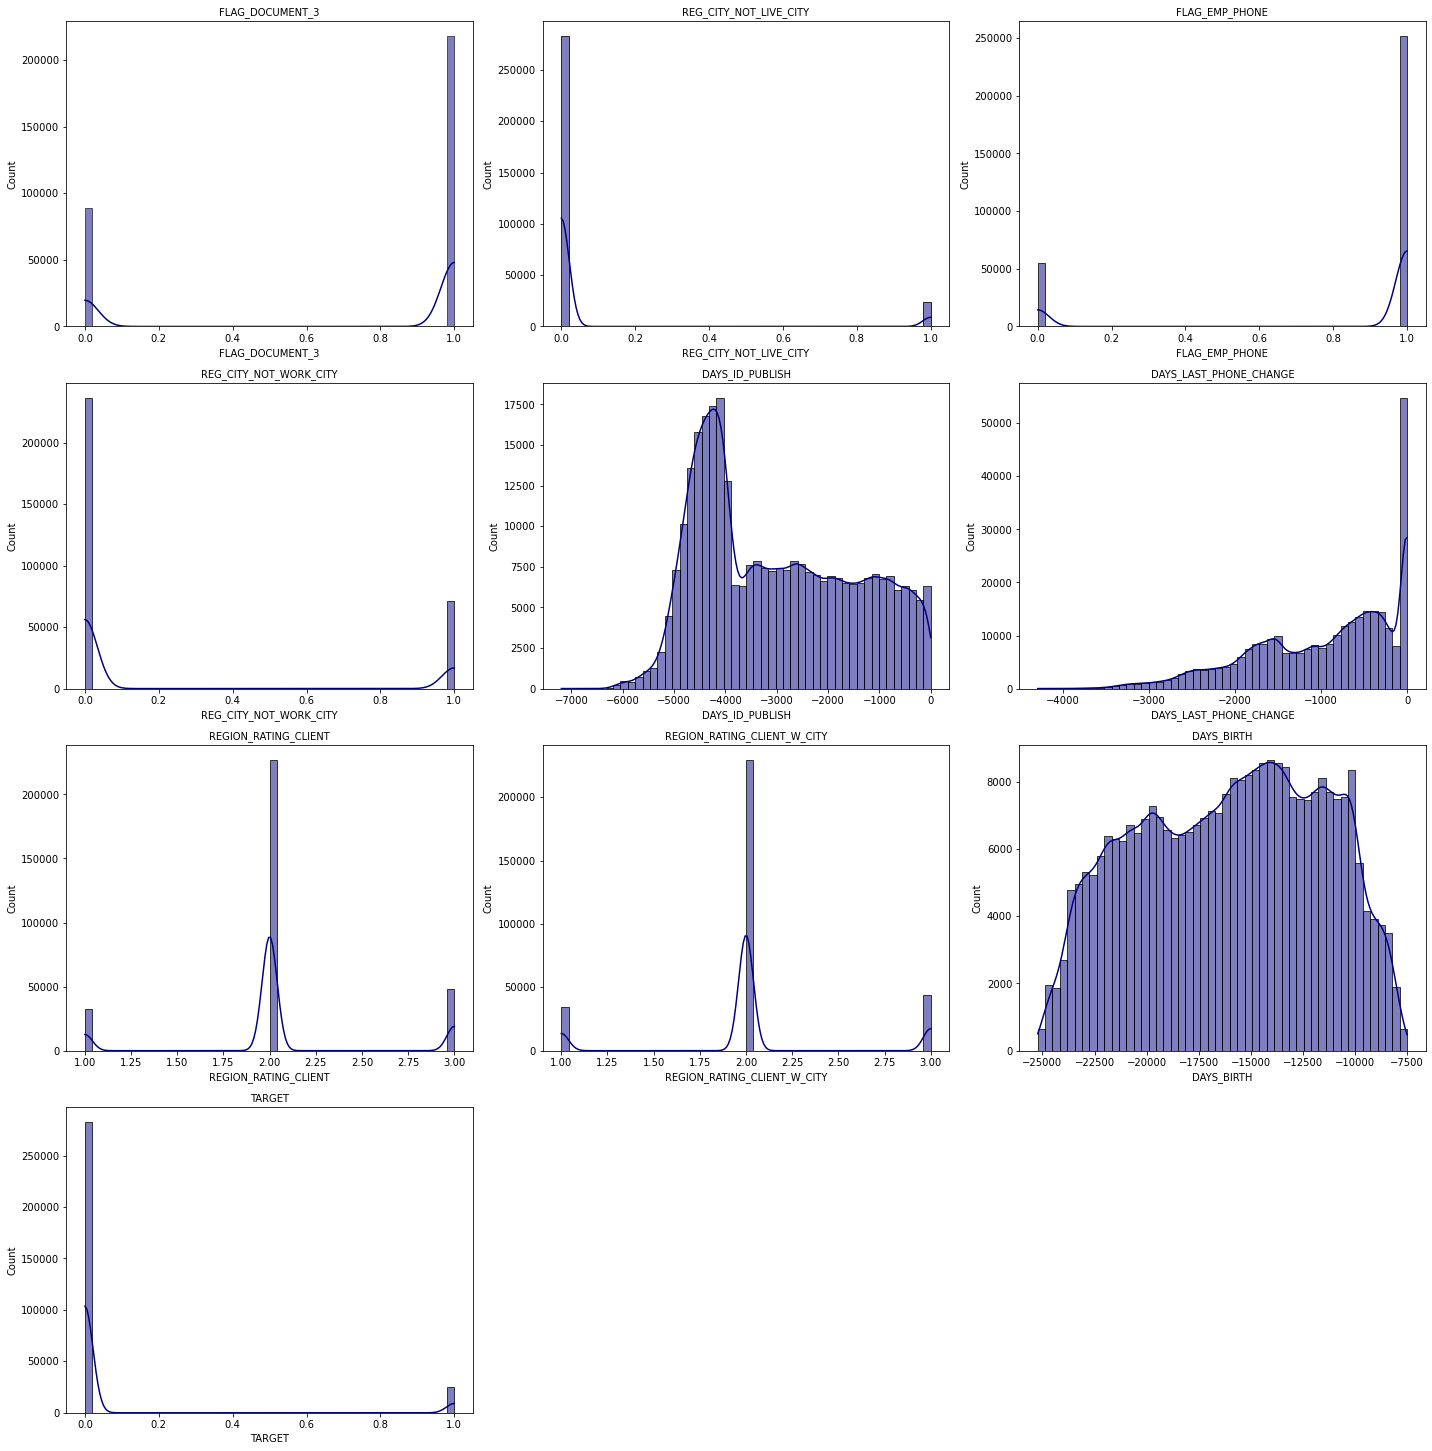

In [ ]:
#Distribution of top 10 positive correlation variables 
numVar = pos_corr.shape[0]

plt.figure(figsize=(20,50))
for i,var in enumerate(pos_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    
    plt.subplot(numVar,3,i+1)
    plot = sns.histplot(datasets['application_train'][var],kde=True,bins=50,color='navy')
    plt.subplots_adjust(hspace=0.50)
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

### Observation
Above plot shows us the histogram of the top 10 positively correlated values to the Target variable. We have used the Kernel Density Estimation feature to visualize the probability distributio of the features

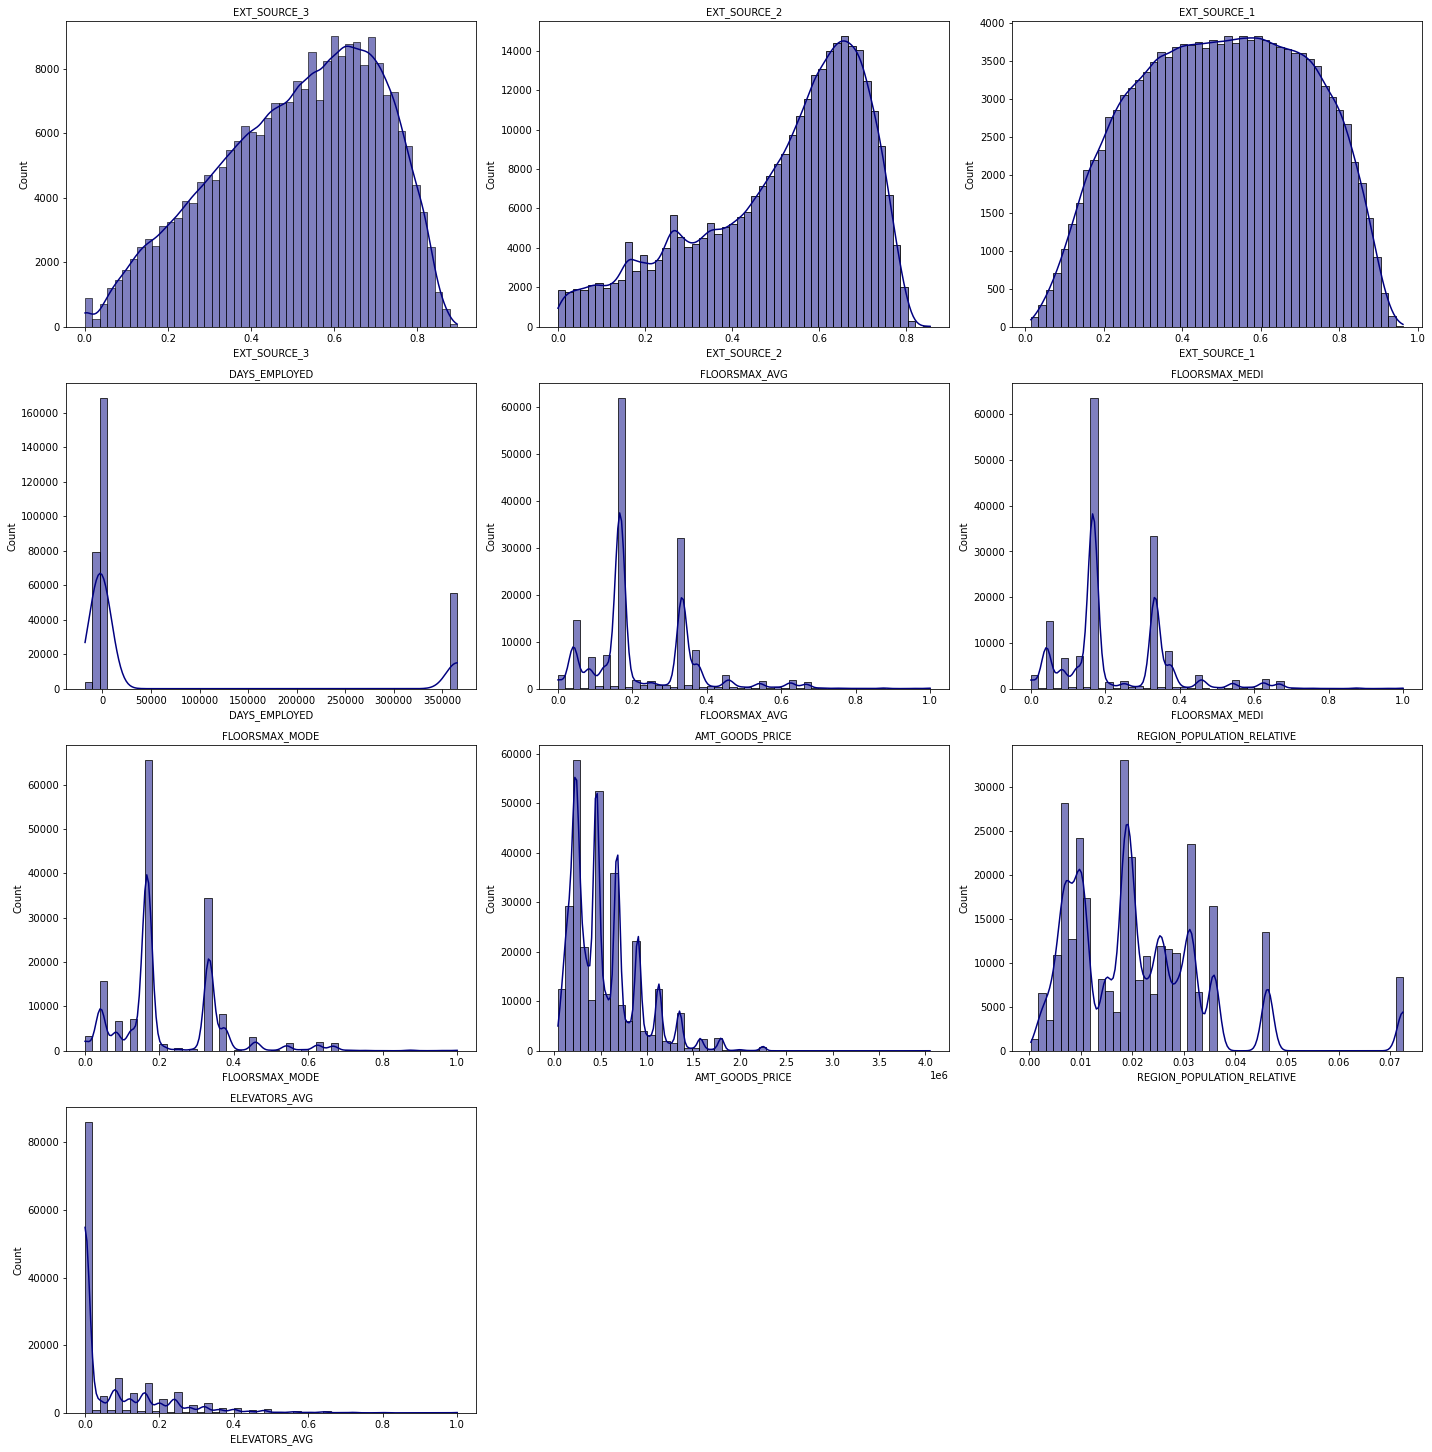

In [ ]:
#Distribution of top 10 negative correlation variables 
numVar = neg_corr.shape[0]

plt.figure(figsize=(20,50))
for i,col in enumerate(neg_corr):    
    defaulter = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,col]
    non_defaulter = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,col]
    
    mu = np.mean(datasets['application_train'][col])
    median = np.median(datasets['application_train'][col])
    sigma = np.std(datasets['application_train'][col])
    plt.subplot(numVar,3,i+1)
    plot = sns.histplot(data=datasets['application_train'][col],kde=True,bins=50,color='navy')
    #plot.text(0.5, 45, r'$\mu=mu,\ \sigma=sigma$, median='+str(median))
    plt.subplots_adjust(hspace=0.50)
    plt.title(col, fontsize = 10)
    plt.tight_layout()
plt.show()

### Observation
Above plot shows us the histogram of the top 10 negatively correlated values to the Target variable. We have used the Kernel Density Estimation feature to visualize the probability distributio of the features.
We can see that the distribution of 'EXT_SOURCE_2' and 'EXT_SOURCE_3' are right skewed, whereas 'EXT_SOURCE_1' approximately follows a normal distribution.

## Applicants Age 

In [ ]:
x = datasets['application_train']
#plt.hist(x[x['TARGET'] == 1]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.hist([x[x['TARGET'] == 1]['DAYS_BIRTH'] / -365,x[x['TARGET'] == 0]['DAYS_BIRTH'] / -365], edgecolor = 'k', bins = 25,color=['b','g'],label=['default','non-default'])
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

### Observation
Here we can see that the Defaulters lie between the ages 25 to 40.

## Applicants occupations

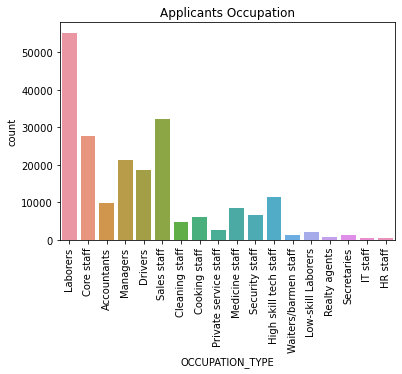

In [ ]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

### Observation
We see that the majority of the applicants are Laborers, Sales staff and Core staff.

## Applicants Gender

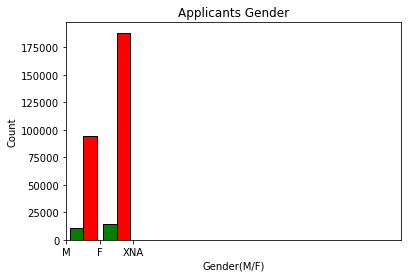

In [ ]:
#plt.hist(datasets["application_train"]['CODE_GENDER'] , edgecolor = 'k',stacked=True)
plt.hist([x[x['TARGET'] == 1]['CODE_GENDER'] ,x[x['TARGET'] == 0]['CODE_GENDER']], edgecolor = 'k', bins = 2,color=['g','r'],label=['default','non-default'])
plt.title('Applicants Gender'); plt.xlabel('Gender(M/F)'); plt.ylabel('Count');plt.xlim(0,10); 

Text(0, 0.5, 'Count')

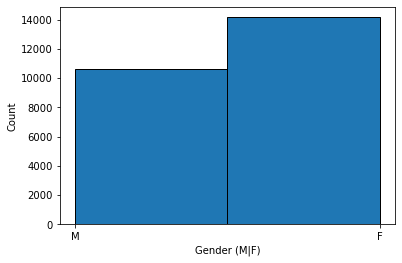

In [ ]:
plt.hist([x[x['TARGET'] == 1]['CODE_GENDER']], edgecolor = 'k', bins = 2)
plt.xlabel('Gender (M|F)')
plt.ylabel('Count')

### Observation
Here we notice that number of Female applicants who are defaulters is slightly higher than Male applicants.

## Number of children of applicants

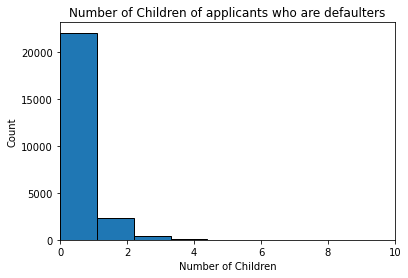

In [ ]:
plt.hist(x[x['TARGET']==1]['CNT_CHILDREN'] , edgecolor = 'k', bins = 10)
plt.title('Number of Children of applicants who are defaulters'); plt.xlabel('Number of Children'); plt.ylabel('Count');plt.xlim(0,10);

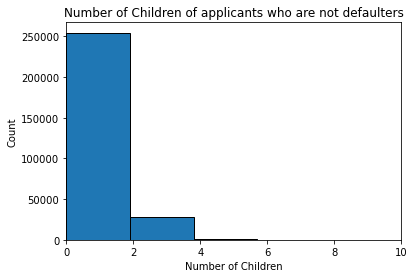

In [ ]:
plt.hist(x[x['TARGET']==0]['CNT_CHILDREN'] , edgecolor = 'k', bins = 10)
plt.title('Number of Children of applicants who are not defaulters'); plt.xlabel('Number of Children'); plt.ylabel('Count');plt.xlim(0,10);

### Observation:
We see that people mostly having no children are defaulting.

## Types of Loans

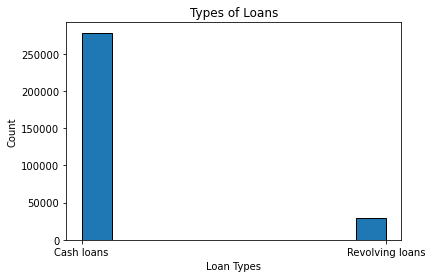

In [ ]:
plt.hist(datasets["application_train"]['NAME_CONTRACT_TYPE'] , edgecolor = 'k')
plt.title('Types of Loans'); plt.xlabel('Loan Types'); plt.ylabel('Count');

## Car Ownership

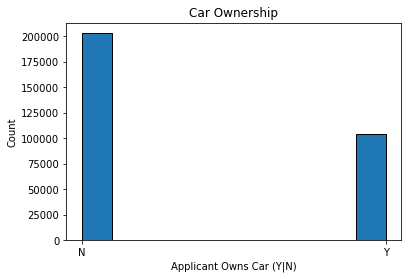

In [ ]:
plt.hist(datasets["application_train"]['FLAG_OWN_CAR'] , edgecolor = 'k')
plt.title('Car Ownership'); plt.xlabel('Applicant Owns Car (Y|N)'); plt.ylabel('Count');

## Real Estate Ownership

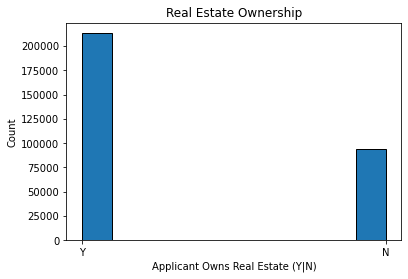

In [ ]:
plt.hist(datasets["application_train"]['FLAG_OWN_REALTY'] , edgecolor = 'k')
plt.title('Real Estate Ownership'); plt.xlabel('Applicant Owns Real Estate (Y|N)'); plt.ylabel('Count');

# Dataset questions
## Unique record for each SK_ID_CURR

In [147]:
list(datasets.keys())

['application_train',
 'application_test',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'previous_application',
 'POS_CASH_balance']

In [148]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [149]:
# is there an overlap between the test and train customers 
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [150]:
# 
datasets["application_test"].shape

(48744, 121)

In [151]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [152]:
appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300       17145.0000   
1     2802425      108129         Cash loans   25188.6150      607500.0000   
2     2523466      122040         Cash loans   15060.7350      112500.0000   
3     2819243      176158         Cash loans   47041.3350      450000.0000   
4     1784265      202054         Cash loans   31924.3950      337500.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0000            0.0000       17145.0000                   SATURDAY   
1 679671.0000               NaN      607500.0000                   THURSDAY   
2 136444.5000               NaN      112500.0000                    TUESDAY   
3 470790.0000               NaN      450000.0000                     MONDAY   
4 404055.0000               NaN      337500.0000                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity      12.0000   
1                       11  ...                  XNA      36.0000   
2                       11  ...                  XNA      12.0000   
3                        7  ...                  XNA      12.0000   
4                        9  ...                  XNA      24.0000   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest         365243.0000   
1        low_action          Cash X-Sell: low         365243.0000   
2              high         Cash X-Sell: high         365243.0000   
3            middle       Cash X-Sell: middle         365243.0000   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0       -42.0000                  300.0000       -42.0000         -37.0000   
1      -134.0000                  916.0000    365243.0000      365243.0000   
2      -271.0000                   59.0000    365243.0000      365243.0000   
3      -482.0000                 -152.0000      -182.0000        -177.0000   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                    0.0000  
1                    1.0000  
2                    1.0000  
3                    1.0000  
4                       NaN  

[5 rows x 37 columns]

1,670,214 rows, 37 columns


In [153]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [154]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 291,057


In [155]:
prevAppCount_train = pd.DataFrame(columns=['SK_ID_CURR'])
prevAppCount_train['SK_ID_CURR'] = np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])

In [156]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 47,800


In [157]:
prevAppCount_test = pd.DataFrame(columns=['SK_ID_CURR'])
prevAppCount_test['SK_ID_CURR'] = np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

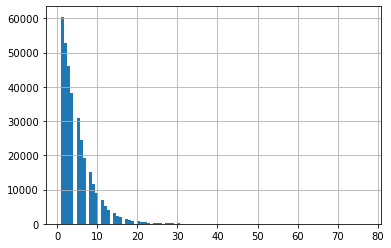

In [158]:
# How many previous applciations  per applicant in the previous_application 
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications
plt.hist(prevAppCounts[prevAppCounts>=0], bins=100)
plt.grid()

In [159]:
prevAppCounts_df = prevAppCounts.to_frame()

In [160]:
prevAppCounts_df.columns = ['Count']
prevAppCounts_df['SK_ID_CURR'] = prevAppCounts.index

In [161]:
prevAppCounts_df

Count  SK_ID_CURR
187868     77      187868
265681     73      265681
173680     72      173680
242412     68      242412
206783     67      206783
...       ...         ...
135285      1      135285
311960      1      311960
427136      1      427136
241434      1      241434
191629      1      191629

[338857 rows x 2 columns]

In [162]:
prevAppCounts_df['AverageAppAmt'] = appsDF.groupby(['SK_ID_CURR'])['AMT_APPLICATION'].mean()

In [163]:
prevAppCounts_df

Count  SK_ID_CURR  AverageAppAmt
187868     77      187868     31120.4221
265681     73      265681    172251.8014
173680     72      173680    113228.3750
242412     68      242412    216069.9598
206783     67      206783    197149.3657
...       ...         ...            ...
135285      1      135285    154273.5000
311960      1      311960    341959.5000
427136      1      427136     62473.5000
241434      1      241434    137848.5000
191629      1      191629         0.0000

[338857 rows x 3 columns]

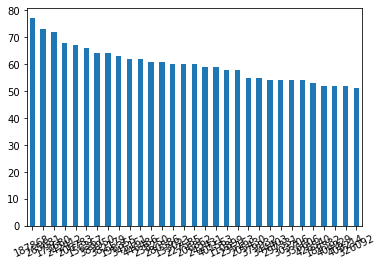

In [164]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

### Histogram of Number of previous applications for an ID

In [165]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

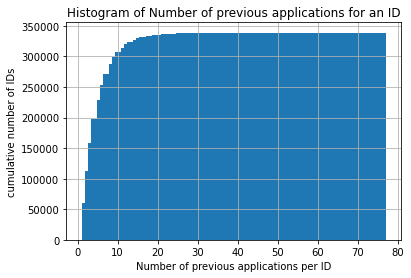

In [166]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [167]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


In [168]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [169]:
funcs = ["a","b","c"]
{f:f"{f}_max" for f in funcs}

{'a': 'a_max', 'b': 'b_max', 'c': 'c_max'}

In [170]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN           0.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6      0.0000               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

In [171]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]["AMT_CREDIT"]

6   0.0000
Name: AMT_CREDIT, dtype: float64

In [172]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN           0.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6      0.0000               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

## Missing values in prevApps

In [173]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [174]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

appsDF[agg_op_features].head()

In [175]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
print(f"{appsDF[features].describe()}")
agg_ops = ["min", "max", "mean"]
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
display(result.head())
print("-"*50)
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
result.columns = result.columns.map('_'.join)
display(result)
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

       AMT_ANNUITY  AMT_APPLICATION
count 1297979.0000     1670214.0000
mean    15955.1207      175233.8604
std     14782.1373      292779.7624
min         0.0000           0.0000
25%      6321.7800       18720.0000
50%     11250.0000       71046.0000
75%     20658.4200      180360.0000
max    418058.1450     6905160.0000


SK_ID_CURR   SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      100001 1369693.0000    3951.0000       24835.5000  23787.0000   
1      100002 1038818.0000    9251.7750      179055.0000 179055.0000   
2      100003 2281150.3333   56553.9900      435436.5000 484191.0000   
3      100004 1564014.0000    5357.2500       24282.0000  20106.0000   
4      100005 2176837.0000    4813.2000       22308.7500  20076.7500   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0         2520.0000       24835.5000                  13.0000   
1            0.0000      179055.0000                   9.0000   
2         3442.5000      435436.5000                  14.6667   
3         4860.0000       24282.0000                   5.0000   
4         4464.0000       44617.5000                  10.5000   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  ...  RATE_INTEREST_PRIVILEGED  \
0                  1.0000             0.1043  ...                       NaN   
1                  1.0000             0.0000  ...                       NaN   
2                  1.0000             0.0500  ...                       NaN   
3                  1.0000             0.2120  ...                       NaN   
4                  1.0000             0.1090  ...                       NaN   

   DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  \
0     -1740.0000           23.0000       8.0000         365243.0000   
1      -606.0000          500.0000      24.0000         365243.0000   
2     -1305.0000          533.0000      10.0000         365243.0000   
3      -815.0000           30.0000       4.0000         365243.0000   
4      -536.0000           18.0000      12.0000         365243.0000   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0      -1709.0000                 -1499.0000     -1619.0000        -1612.0000   
1       -565.0000                   125.0000       -25.0000          -17.0000   
2      -1274.3333                 -1004.3333     -1054.3333        -1047.3333   
3       -784.0000                  -694.0000      -724.0000         -714.0000   
4       -706.0000                  -376.0000      -466.0000         -460.0000   

   NFLAG_INSURED_ON_APPROVAL  
0                     0.0000  
1                     0.0000  
2                     0.6667  
3                     0.0000  
4                     0.0000  

[5 rows x 21 columns]

--------------------------------------------------


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0            100001        3951.0000        3951.0000         3951.0000   
1            100002        9251.7750        9251.7750         9251.7750   
2            100003        6737.3100       98356.9950        56553.9900   
3            100004        5357.2500        5357.2500         5357.2500   
4            100005        4813.2000        4813.2000         4813.2000   
...             ...              ...              ...               ...   
338852       456251        6605.9100        6605.9100         6605.9100   
338853       456252       10074.4650       10074.4650        10074.4650   
338854       456253        3973.0950        5567.7150         4770.4050   
338855       456254        2296.4400       19065.8250        10681.1325   
338856       456255        2250.0000       54022.1400        20775.3919   

        AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  
0                24835.5000           24835.5000            24835.5000  
1               179055.0000          179055.0000           179055.0000  
2                68809.5000          900000.0000           435436.5000  
3                24282.0000           24282.0000            24282.0000  
4                    0.0000           44617.5000            22308.7500  
...                     ...                  ...                   ...  
338852           40455.0000           40455.0000            40455.0000  
338853           57595.5000           57595.5000            57595.5000  
338854           19413.0000           28912.5000            24162.7500  
338855           18846.0000          223789.5000           121317.7500  
338856           45000.0000         1170000.0000           362770.8750  

[338857 rows x 7 columns]

result.shape: (338857, 8)


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0       100001        3951.0000        3951.0000         3951.0000   
1       100002        9251.7750        9251.7750         9251.7750   
2       100003        6737.3100       98356.9950        56553.9900   
3       100004        5357.2500        5357.2500         5357.2500   
4       100005        4813.2000        4813.2000         4813.2000   
5       100006        2482.9200       39954.5100        23651.1750   
6       100007        1834.2900       22678.7850        12278.8050   
7       100008        8019.0900       25309.5750        15839.6963   
8       100009        7435.8450       17341.6050        10051.4121   
9       100010       27463.4100       27463.4100        27463.4100   

   AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  \
0           24835.5000           24835.5000            24835.5000   
1          179055.0000          179055.0000           179055.0000   
2           68809.5000          900000.0000           435436.5000   
3           24282.0000           24282.0000            24282.0000   
4               0.0000           44617.5000            22308.7500   
5               0.0000          688500.0000           272203.2600   
6           17176.5000          247500.0000           150530.2500   
7               0.0000          450000.0000           155701.8000   
8           40455.0000          110160.0000            76741.7143   
9          247212.0000          247212.0000           247212.0000   

   range_AMT_APPLICATION  
0                 0.0000  
1                 0.0000  
2            831190.5000  
3                 0.0000  
4             44617.5000  
5            688500.0000  
6            230323.5000  
7            450000.0000  
8             69705.0000  
9                 0.0000

In [176]:
result.isna().sum()

SK_ID_CURR_                0
AMT_ANNUITY_min          480
AMT_ANNUITY_max          480
AMT_ANNUITY_mean         480
AMT_APPLICATION_min        0
AMT_APPLICATION_max        0
AMT_APPLICATION_mean       0
range_AMT_APPLICATION      0
dtype: int64

## feature transformer for prevApp table

In [177]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        self.agg_op_features1 = {}
        for f in features:
            self.agg_op_features1[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f] = {np.min,np.max,np.mean}
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit   
        #print(self.agg_op_features)
        c=[]
        #self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
        for i in self.agg_op_features1.keys():
            for j in self.agg_op_features1[i]:
                c.append(j)
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = c
        #result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        #print(result.head())
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0    1730.4300       17145.0000
1   25188.6150      607500.0000
2   15060.7350      112500.0000
3   47041.3350      450000.0000
4   31924.3950      337500.0000
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0      100001        3951.0000        3951.0000         3951.0000   
1      100002        9251.7750        9251.7750         9251.7750   
2      100003       56553.9900       98356.9950         6737.3100   
3      100004        5357.2500        5357.2500         5357.2500   
4      100005        4813.2000        4813.2000         4813.2000   
5      100006       23651.1750       39954.5100         2482.9200   
6      100007       12278.8050       22678.7850         1834.2900   
7      100008       15839.6963       25309.5750         8019.0900   
8      100009       10051.4121       17341.6050         7435.8450   
9      100010       27463.4

## Feature Engineering

### Adding number of previous applications per applicant in 'previous_applications' 

In [178]:
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)

In [179]:
prevAppCounts_df = prevAppCounts.to_frame()

In [180]:
prevAppCounts_df.columns = ['Count']
prevAppCounts_df['SK_ID_CURR'] = prevAppCounts.index

In [181]:
prevAppCounts_df

Count  SK_ID_CURR
187868     77      187868
265681     73      265681
173680     72      173680
242412     68      242412
206783     67      206783
...       ...         ...
135285      1      135285
311960      1      311960
427136      1      427136
241434      1      241434
191629      1      191629

[338857 rows x 2 columns]

In [182]:
prevAppCounts_df.shape

(338857, 2)

In [183]:
prevAppCounts_df['AverageAppAmt'] = appsDF.groupby(['SK_ID_CURR'])['AMT_APPLICATION'].mean()

In [184]:
prevAppCounts_df

Count  SK_ID_CURR  AverageAppAmt
187868     77      187868     31120.4221
265681     73      265681    172251.8014
173680     72      173680    113228.3750
242412     68      242412    216069.9598
206783     67      206783    197149.3657
...       ...         ...            ...
135285      1      135285    154273.5000
311960      1      311960    341959.5000
427136      1      427136     62473.5000
241434      1      241434    137848.5000
191629      1      191629         0.0000

[338857 rows x 3 columns]

In [185]:
appsDF = pd.merge(appsDF,prevAppCounts_df,how='left',on='SK_ID_CURR')

In [186]:
appsDF.shape

(1670214, 39)

In [187]:
# Remove columns with missing values more than the threshold limit
class DropMissingValues(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = 60):
        self.threshold = threshold
        
    def fit(self, X, y=None):
        
        percent = (X.isnull().sum()/X.isnull().count()*100).sort_values(ascending = False).round(2)
        
        missing_col  = pd.DataFrame(percent, columns=['Percent'])
        
        self.columns_to_drop = list(missing_col.index[missing_col['Percent'] > self.threshold])
        
            
        return self
    
    def transform(self, X, y=None):
        try:
            X.drop(columns = self.columns_to_drop, axis=1,inplace=True)
        except:
            pass
        
        
        return X


In [188]:
#Removes one of the two collinear features with a high degree of collinearity
class DropCollinearValues(BaseEstimator,TransformerMixin):
    def __init__(self,threshold = 0.85):
        self.threshold = threshold
    
    def fit(self,X,y=None):
        corr_matrix = X.corr().abs()
        
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
        self.col_to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
        
        return self
    
    def transform(self,X,y=None):
        X = X.drop(columns = self.col_to_drop, axis=1)
        
        return X
        

## Join the labeled dataset

In [189]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [190]:
## Transform all secondary tables
class feature_Aggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None,p_id=None): # no *args or **kargs
        self.features = features
        self.p_id = p_id
        self.agg_op_features = {}
        self.agg_op_features1 = {}
        for f in features:
            self.agg_op_features1[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f] = {np.min,np.max,np.mean}
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit   
        #print(self.agg_op_features)
        c=[]
        #self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
        for i in self.agg_op_features1.keys():
            for j in self.agg_op_features1[i]:
                c.append(j)
        result = X.groupby([self.p_id]).agg(self.agg_op_features)
        result.columns = c
        #result.columns = result.columns.droplevel()
        result = result.reset_index(level=[self.p_id])
        #print(result.head())
        return result # return dataframe with the join key "SK_ID_CURR"

In [191]:
## Previous App

features = ['AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT']
prevApps_feature_pipeline = Pipeline([('prevApps_aggregater', feature_Aggregater(features,'SK_ID_CURR')),
                                    ('missing_feature_remover',DropMissingValues()),
                                    ('drop_collinear_features',DropCollinearValues()),  
                                     ])

prevAppsDF = datasets['previous_application']
prevAppsDF.shape

(1670214, 37)

In [106]:
## POS_CASH_balance

POS_CASH_balance_features = ['MONTHS_BALANCE','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE']
POS_CASH_balance_pipeline = Pipeline([
                                    ('POS_CASH_balance_aggregater', feature_Aggregater(POS_CASH_balance_features,'SK_ID_PREV')),
                                      ('missing_feature_remover',DropMissingValues()),
                                      ('drop_collinear_features',DropCollinearValues()),
                                     ])

POS_CASH_balanceDF = datasets['POS_CASH_balance']
POS_CASH_balanceDF.dropna(inplace=True)
POS_CASH_balanceDF.shape

(9975174, 8)

In [107]:
## installments_payments
installments_payments_features = ['DAYS_INSTALMENT','AMT_INSTALMENT']

installments_payments_pipeline = Pipeline([
                                        ('installments_payments_aggregater', feature_Aggregater(installments_payments_features,'SK_ID_PREV')),
                                         ('missing_feature_remover',DropMissingValues()),
                                      ('drop_collinear_features',DropCollinearValues())
                                          ])

installments_paymentsDF = datasets['installments_payments']
installments_paymentsDF.dropna(inplace=True)
installments_paymentsDF.shape

(13602496, 8)

In [108]:
## credit_card_balance
credit_card_balance_features = ['AMT_BALANCE','AMT_DRAWINGS_CURRENT']

credit_card_balance_pipeline = Pipeline([('credit_card_balance_aggregater', feature_Aggregater(credit_card_balance_features,'SK_ID_PREV')),
                                         ('missing_feature_remover',DropMissingValues()),
                                      ('drop_collinear_features',DropCollinearValues()),
                                        ])

credit_card_balanceDF = datasets['credit_card_balance']
credit_card_balanceDF.dropna(inplace=True)
credit_card_balanceDF.shape

(3014276, 23)

In [109]:
## bureau_balance
bureau_balance_features = ['MONTHS_BALANCE']

bureau_balance_pipeline = Pipeline([('bureau_balance_aggregater', feature_Aggregater(bureau_balance_features,'SK_ID_BUREAU')),
                                   ('missing_feature_remover',DropMissingValues()),
                                      ('drop_collinear_features',DropCollinearValues()),
                                   ])

bureau_balanceDF = datasets['bureau_balance']
bureau_balanceDF.dropna(inplace=True)
bureau_balanceDF.shape

(27299925, 3)

In [110]:
## bureau
bureau_features = ['AMT_CREDIT_SUM']

bureau_pipeline = Pipeline([('bureau_aggregater', feature_Aggregater(bureau_features,'SK_ID_BUREAU')),
                             ('missing_feature_remover',DropMissingValues()),
                                      ('drop_collinear_features',DropCollinearValues()),
                             ])

bureauDF = datasets['bureau']
bureauDF.dropna(inplace=True)
bureauDF.shape

(39666, 17)

In [111]:
appsDF

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans    1730.4300   
1           2802425      108129         Cash loans   25188.6150   
2           2523466      122040         Cash loans   15060.7350   
3           2819243      176158         Cash loans   47041.3350   
4           1784265      202054         Cash loans   31924.3950   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans   14704.2900   
1670210     2357031      334635     Consumer loans    6622.0200   
1670211     2659632      249544     Consumer loans   11520.8550   
1670212     2785582      400317         Cash loans   18821.5200   
1670213     2418762      261212         Cash loans   16431.3000   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0             17145.0000  17145.0000            0.0000       17145.0000   
1            607500.0000 679671.0000               NaN      607500.0000   
2            112500.0000 136444.5000               NaN      112500.0000   
3            450000.0000 470790.0000               NaN      450000.0000   
4            337500.0000 404055.0000               NaN      337500.0000   
...                  ...         ...               ...              ...   
1670209      267295.5000 311400.0000            0.0000      267295.5000   
1670210       87750.0000  64291.5000        29250.0000       87750.0000   
1670211      105237.0000 102523.5000        10525.5000      105237.0000   
1670212      180000.0000 191880.0000               NaN      180000.0000   
1670213      360000.0000 360000.0000               NaN      360000.0000   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
0                         SATURDAY                       15  ...   
1                         THURSDAY                       11  ...   
2                          TUESDAY                       11  ...   
3                           MONDAY                        7  ...   
4                         THURSDAY                        9  ...   
...                            ...                      ...  ...   
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

        NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0                 middle     POS mobile with interest         365243.0000   
1             low_action             Cash X-Sell: low         365243.0000   
2                   high            Cash X-Sell: high         365243.0000   
3                 middle          Cash X-Sell: middle         365243.0000   
4                   high            Cash Street: high                 NaN   
...                  ...                          ...                 ...   
1670209       low_normal   POS industry with interest         365243.0000   
1670210           middle   POS industry with interest         365243.0000   
1670211       low_normal  POS household with interest         365243.0000   
1670212       low_normal             Cash X-Sell: low         365243.0000   
1670213           middle          Cash X-Sell: middle         365243.0000   

         DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE  \
0              -42.0000                   300.0000      -42.0000   
1             -134.0000                   916.0000   365243.0000   
2             -271.0000                    59.0000   365243.0000   
3             -482.0000                  -152.0000     -182.0000   
4                   NaN                        NaN           NaN   
...                 ...                        ...           ...   
1670209       -508.0000                   362.0000     -358.0000   
1670210      -160

In [112]:


X_train= datasets["application_train"] #primary dataset
#appsDF = datasets["previous_application"] #prev app

merge_all_data = True

# transform all the secondary tables
# 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
# 'previous_application', 'POS_CASH_balance'

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.fit_transform(appsDF)
    POS_CASH_balance_aggregated = POS_CASH_balance_pipeline.fit_transform(POS_CASH_balanceDF)
    try:
        installments_payments_aggregated = installments_payments_pipeline.transform(installments_paymentsDF)
    except:
        installment_pipeline = Pipeline([
                                        ('installments_payments_aggregater', feature_Aggregater(installments_payments_features,'SK_ID_PREV')),
                                      ('drop_collinear_features',DropCollinearValues())
                                          ])
        installments_payments_aggregated = installments_payments_pipeline.fit_transform(installments_paymentsDF)

        
    credit_card_balance_aggregated = credit_card_balance_pipeline.fit_transform(credit_card_balanceDF)
    bureau_balance_aggregated = bureau_balance_pipeline.fit_transform(bureau_balanceDF)
    bureau_aggregated = bureau_pipeline.fit_transform(bureauDF)
    prevAppsDF = appsDF.merge(POS_CASH_balance_aggregated, how='left', on="SK_ID_PREV")
    prevAppsDF = prevAppsDF.merge(installments_payments_aggregated, how='left', on="SK_ID_PREV")
    prevAppsDF = prevAppsDF.merge(credit_card_balance_aggregated, how='left', on="SK_ID_PREV")
    bureauDF = bureauDF.merge(bureau_balance_aggregated, how='left', on="SK_ID_BUREAU")
    bureauDF = bureauDF.merge(bureau_aggregated, how='left', on="SK_ID_BUREAU")
    prevAppsDF= prevAppsDF.merge(bureauDF, how='left', on="SK_ID_CURR")
    X_train = X_train.merge(prevAppsDF, how='left', on="SK_ID_CURR")


In [113]:
X_train.to_csv("X_train_final.csv",index=False)

In [114]:
X_train.shape

(1519680, 191)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [ ]:
X_train = pd.read_csv("X_train_final.csv")

In [115]:
X_train.drop_duplicates(inplace=True)

## Join the unlabeled dataset (i.e., the submission file)

In [116]:
merge_all_data=True
X_kaggle_test= datasets["application_test"]
if merge_all_data:
    
    X_kaggle_test = X_kaggle_test.merge(prevAppsDF, how='left', on='SK_ID_CURR')

    #Since the PrevAppsDF is already merged with other secondary tables, we are only merging prevAppsDF with X_kaggle_test

In [117]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


# Processing pipeline

## HCDR preprocessing

# Exp 1 : Using selected features

In [118]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = True #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    y_train1 = datasets["application_train"]['TARGET']
    X_train1 = datasets["application_train"][selected_features]
    X_train1, X_valid, y_train1, y_valid = train_test_split(X_train1, y_train1, test_size=0.15, random_state=42)
    X_train1, X_test, y_train1, y_test = train_test_split(X_train1, y_train1, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
#y_train1 = X_train1['TARGET']
X_train1 = X_train1[selected_features]
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train1, y_train1, test_size=0.15, random_state=42)
X_train1, X_test, y_train1, y_test = train_test_split(X_train1, y_train1, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train1.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (160521, 14)
X validation      shape: (33327, 14)
X test            shape: (28328, 14)
X X_kaggle_test   shape: (48744, 14)


In [119]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train1.shape: {X_train1.shape}\n")
    print(f"X_train1['name'][0:5]: \n{X_train1[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train1))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train1['name'][0:10]: \n{X_train1[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)

X_train1.shape: (160521, 14)

X_train1['name'][0:5]: 
       OCCUPATION_TYPE
116186      Core staff
6724               NaN
124631        IT staff
227274        Laborers
17804         Laborers
X_train1.shape: (160521, 14)

X_train1['name'][0:5]: 
       OCCUPATION_TYPE
116186      Core staff
6724               NaN
124631        IT staff
227274        Laborers
17804         Laborers
Test driver: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
X_train1['name'][0:10]: 
       OCCUPATION_TYPE
116186      Core staff
6724               NaN
124631        IT staff
227274        Laborers
17804         Laborers
254137        Managers
272706      Core staff
267209             NaN
78714              NaN
158459             NaN


In [120]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [121]:
# Identify the numeric features we wish to consider. 
num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              



## Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [192]:
def pct(x):
    return round(100*x,3)

In [193]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [ ]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear",LogisticRegression())
    ])
model_LR = full_pipeline_with_predictor.fit(X_train1, y_train1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("dt",DecisionTreeClassifier(max_depth=3))
    ])
model_DT = full_pipeline_with_predictor.fit(X_train1, y_train1)


In [ ]:
%%time 
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("RandomForest",RandomForestClassifier(max_depth=2, random_state=0))
    ])
model_RF = full_pipeline_with_predictor.fit(X_train1, y_train1)


CPU times: user 2.93 s, sys: 28.9 ms, total: 2.95 s
Wall time: 2.97 s


In [ ]:
%%time 
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ('Gaussian Naive Bayes',  GaussianNB())
    ])
model_gnb = full_pipeline_with_predictor.fit(X_train1, y_train1)


CPU times: user 292 ms, sys: 79.6 ms, total: 372 ms
Wall time: 367 ms


In [ ]:
from sklearn.metrics import accuracy_score

print("Logistic Regression",np.round(accuracy_score(y_train1, model_LR.predict(X_train1)), 3))
print("Decision Tree",np.round(accuracy_score(y_train1, model_DT.predict(X_train1)), 3))
print("Random Forest",np.round(accuracy_score(y_train1, model_RF.predict(X_train1)), 3))
print("Gaussian Naive Bayes",np.round(accuracy_score(y_train1, model_gnb.predict(X_train1)), 3))

Logistic Regression 0.919
Decision Tree 0.919
Random Forest 0.919
Gaussian Naive Bayes 0.095


## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
from sklearn.metrics import roc_auc_score
print("Logistic Regression",roc_auc_score(y_train1, model_LR.predict_proba(X_train1)[:, 1]))
print("Decision Tree",roc_auc_score(y_train1, model_DT.predict_proba(X_train1)[:, 1]))
print("Random Forest",roc_auc_score(y_train1, model_RF.predict_proba(X_train1)[:, 1]))
print("Gaussian Naive Bayes",roc_auc_score(y_train1, model_gnb.predict_proba(X_train1)[:, 1]))


Logistic Regression 0.7386557457152251
Decision Tree 0.6912113439460034
Random Forest 0.7159472496550935
Gaussian Naive Bayes 0.6543245688723108


In [ ]:
exp_name = f"Baseline_{len(num_attribs)+len(cat_attribs)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train1, model_LR.predict(X_train1)), 
                accuracy_score(y_valid, model_LR.predict(X_valid)),
                accuracy_score(y_test, model_LR.predict(X_test)),
                roc_auc_score(y_train1,model_LR.predict_proba(X_train1)[:, 1]),
                roc_auc_score(y_valid, model_LR.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_14_features     0.9194     0.9204     0.9211     0.7387   

   Valid AUC  Test  AUC  
0     0.7242     0.7308

In [ ]:
exp_name = f"Baseline_{len(num_attribs)+len(cat_attribs)}_features_using_Decision_Tree"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train1, model_DT.predict(X_train1)), 
                accuracy_score(y_valid, model_DT.predict(X_valid)),
                accuracy_score(y_test, model_DT.predict(X_test)),
                roc_auc_score(y_train1,model_DT.predict_proba(X_train1)[:, 1]),
                roc_auc_score(y_valid, model_DT.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_DT.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  \
0                      Baseline_14_features     0.9194     0.9204     0.9211   
1  Baseline_14_features_using_Decision_Tree     0.9194     0.9205     0.9213   

   Train AUC  Valid AUC  Test  AUC  
0     0.7387     0.7242     0.7308  
1     0.6912     0.6791     0.6802

In [ ]:
exp_name = f"Decision_Tree_{len(num_attribs)+len(cat_attribs)}_features_wi_with Random Forest"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train1, model_RF.predict(X_train1)), 
                accuracy_score(y_valid, model_RF.predict(X_valid)),
                accuracy_score(y_test, model_RF.predict(X_test)),
                roc_auc_score(y_train1, model_RF.predict_proba(X_train1)[:, 1]),
                roc_auc_score(y_valid, model_RF.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_RF.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0                             Baseline_14_features     0.9194     0.9204   
1         Baseline_14_features_using_Decision_Tree     0.9194     0.9205   
2  Decision_Tree_14_features_wi_with Random Forest     0.9194     0.9205   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9211     0.7387     0.7242     0.7308  
1     0.9213     0.6912     0.6791     0.6802  
2     0.9213     0.7159     0.7030     0.7049

In [ ]:
exp_name = f"Decision_Tree_{len(num_attribs)+len(cat_attribs)}_features_wi_with Gaussian Naive BAyes"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train1, model_gnb.predict(X_train1)), 
                accuracy_score(y_valid, model_gnb.predict(X_valid)),
                accuracy_score(y_test, model_gnb.predict(X_test)),
                roc_auc_score(y_train1, model_gnb.predict_proba(X_train1)[:, 1]),
                roc_auc_score(y_valid, model_gnb.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0                               Baseline_14_features     0.9194     0.9204   
1           Baseline_14_features_using_Decision_Tree     0.9194     0.9205   
2    Decision_Tree_14_features_wi_with Random Forest     0.9194     0.9205   
3  Decision_Tree_14_features_wi_with Gaussian Nai...     0.0954     0.0944   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9211     0.7387     0.7242     0.7308  
1     0.9213     0.6912     0.6791     0.6802  
2     0.9213     0.7159     0.7030     0.7049  
3     0.0931     0.6543     0.6388     0.6477

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
test_class_scores_LR = model_LR.predict_proba(X_kaggle_test)[:, 1]
test_class_scores_DT = model_DT.predict_proba(X_kaggle_test)[:, 1]
test_class_scores_RF = model_RF.predict_proba(X_kaggle_test)[:, 1]
test_class_scores_gnb = model_gnb.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
test_class_scores_LR[0:10]

array([0.05390638, 0.2180624 , 0.03034448, 0.06246318, 0.11401997,
       0.05174675, 0.02049211, 0.08862555, 0.01560238, 0.17460847])

In [ ]:
test_class_scores_DT[0:10]

array([0.11959492, 0.15631518, 0.03273966, 0.03273966, 0.0654143 ,
       0.0654143 , 0.03273966, 0.11959492, 0.03273966, 0.11959492])

In [ ]:
test_class_scores_RF[0:10]

array([0.0873281 , 0.09598392, 0.06952399, 0.07190252, 0.09386346,
       0.06496339, 0.06934818, 0.09110013, 0.06294211, 0.10447549])

In [ ]:
test_class_scores_gnb[0:10]

array([0.99999998, 1.        , 1.        , 0.99999999, 1.        ,
       0.99999999, 0.99999837, 0.99999999, 0.99999431, 1.        ])

In [ ]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.056124
1      100005  0.217217
2      100013  0.032462
3      100028  0.063242
4      100038  0.120125

In [ ]:
submit_df.to_csv("submission.csv",index=False)

# Experiment2

In [ ]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = True #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    
    y_train = X_train['TARGET']
    X_train.drop('TARGET',inplace=True,axis=1)
    X_train = X_train[selected_features]
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    #X_kaggle_test= datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

In [138]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


X_train.shape: (1097968, 118)

X_train['name'][0:5]: 
        OCCUPATION_TYPE
87367       Sales staff
1426530        Laborers
30089          Managers
534900         Managers
681012         Managers
X_train.shape: (1097968, 118)

X_train['name'][0:5]: 
        OCCUPATION_TYPE
87367       Sales staff
1426530        Laborers
30089          Managers
534900         Managers
681012         Managers
Test driver: 
[[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
X_train['name'][0:10]: 
        OCCUPATION_TYPE
87367       Sales staff
1426530        Laborers
30089          Managers
534900         Managers
681012         Managers
1324556        Managers
44940           Drivers
1320575             NaN
1315881             NaN
732117              NaN


In [139]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# Identify the numeric features we wish to consider. 
num_attribs = list(numerical_features_app)
num_attribs.extend(installments_payments_aggregated.columns[1:])
num_attribs.extend(credit_card_balance_aggregated.columns[1:])
num_attribs.extend(POS_CASH_balance_aggregated.columns[1:])
num_attribs.extend(bureau_balance_aggregated.columns[1:])
num_attribs.extend(bureau_aggregated.columns[1:])
num_attribs.remove('AMT_CREDIT')
num_attribs.remove('AMT_GOODS_PRICE')
num_attribs.remove('HOUR_APPR_PROCESS_START')

num_attribs.remove('MONTHS_BALANCE_min')
num_attribs.remove('MONTHS_BALANCE_max')
num_attribs.remove('MONTHS_BALANCE_mean')

num_attribs.remove('TARGET')
num_attribs= list(set(num_attribs))
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = list(categorical_features_app)
cat_attribs.remove('NAME_CONTRACT_TYPE')
cat_attribs.remove('NAME_TYPE_SUITE')
cat_attribs.remove('WEEKDAY_APPR_PROCESS_START')
cat_attribs= list(set(cat_attribs))

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              



## Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [ ]:
def pct(x):
    return round(100*x,3)

In [ ]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [ ]:
num_attribs.remove('MONTHS_BALANCE_max')
num_attribs.remove('MONTHS_BALANCE_min')
num_attribs.remove('MONTHS_BALANCE_mean')

In [ ]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear",LogisticRegression())
    ])
model_LR = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: user 41 s, sys: 4.68 s, total: 45.7 s
Wall time: 25.8 s


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("dt",DecisionTreeClassifier(max_depth=3))
    ])
model_DT = full_pipeline_with_predictor.fit(X_train, y_train)


In [ ]:
%%time 
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("RandomForest",RandomForestClassifier(max_depth=2, random_state=0))
    ])
model_RF = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: user 35.8 s, sys: 225 ms, total: 36 s
Wall time: 36.7 s


In [ ]:
%%time 
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ('Gaussian Naive Bayes',  GaussianNB())
    ])
model_gnb = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: user 5.6 s, sys: 214 ms, total: 5.82 s
Wall time: 5.8 s


In [ ]:
from sklearn.metrics import accuracy_score

print("Logistic Regression",np.round(accuracy_score(y_train, model_LR.predict(X_train)), 3))
print("Decision Tree",np.round(accuracy_score(y_train, model_DT.predict(X_train)), 3))
print("Random Forest",np.round(accuracy_score(y_train, model_RF.predict(X_train)), 3))
print("Gaussian Naive Bayes",np.round(accuracy_score(y_train, model_gnb.predict(X_train)), 3))

Logistic Regression 0.914
Decision Tree 0.914
Random Forest 0.914
Gaussian Naive Bayes 0.134


## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
from sklearn.metrics import roc_auc_score
print("Logistic Regression",roc_auc_score(y_train, model_LR.predict_proba(X_train)[:, 1]))
print("Decision Tree",roc_auc_score(y_train, model_DT.predict_proba(X_train)[:, 1]))
print("Random Forest",roc_auc_score(y_train, model_RF.predict_proba(X_train)[:, 1]))
print("Gaussian Naive Bayes",roc_auc_score(y_train, model_gnb.predict_proba(X_train)[:, 1]))


Logistic Regression 0.7435410792102415
Decision Tree 0.6882865614440982
Random Forest 0.7037829703520557
Gaussian Naive Bayes 0.5241071521821117


In [ ]:
exp_name = f"Baseline_{len(num_attribs)+len(cat_attribs)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_LR.predict(X_train)), 
                accuracy_score(y_valid, model_LR.predict(X_valid)),
                accuracy_score(y_test, model_LR.predict(X_test)),
                roc_auc_score(y_train,model_LR.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_LR.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0                               Baseline_14_features     0.9194     0.9204   
1           Baseline_14_features_using_Decision_Tree     0.9194     0.9205   
2    Decision_Tree_14_features_wi_with Random Forest     0.9194     0.9205   
3  Decision_Tree_14_features_wi_with Gaussian Nai...     0.0954     0.0944   
4                              Baseline_136_features     0.9139     0.9132   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9211     0.7387     0.7242     0.7308  
1     0.9213     0.6912     0.6791     0.6802  
2     0.9213     0.7159     0.7030     0.7049  
3     0.0931     0.6543     0.6388     0.6477  
4     0.9146     0.7435     0.7434     0.7419

In [ ]:
exp_name = f"Baseline_{len(num_attribs)+len(cat_attribs)}_features_using_Decision_Tree"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_DT.predict(X_train)), 
                accuracy_score(y_valid, model_DT.predict(X_valid)),
                accuracy_score(y_test, model_DT.predict(X_test)),
                roc_auc_score(y_train,model_DT.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_DT.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_DT.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0                               Baseline_14_features     0.9194     0.9204   
1           Baseline_14_features_using_Decision_Tree     0.9194     0.9205   
2    Decision_Tree_14_features_wi_with Random Forest     0.9194     0.9205   
3  Decision_Tree_14_features_wi_with Gaussian Nai...     0.0954     0.0944   
4                              Baseline_136_features     0.9139     0.9132   
5          Baseline_136_features_using_Decision_Tree     0.9138     0.9135   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9211     0.7387     0.7242     0.7308  
1     0.9213     0.6912     0.6791     0.6802  
2     0.9213     0.7159     0.7030     0.7049  
3     0.0931     0.6543     0.6388     0.6477  
4     0.9146     0.7435     0.7434     0.7419  
5     0.9145     0.6883     0.6854     0.6819

In [ ]:
exp_name = f"Decision_Tree_{len(num_attribs)+len(cat_attribs)}_features_wi_with Random Forest"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_RF.predict(X_train)), 
                accuracy_score(y_valid, model_RF.predict(X_valid)),
                accuracy_score(y_test, model_RF.predict(X_test)),
                roc_auc_score(y_train, model_RF.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_RF.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_RF.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0                               Baseline_14_features     0.9194     0.9204   
1           Baseline_14_features_using_Decision_Tree     0.9194     0.9205   
2    Decision_Tree_14_features_wi_with Random Forest     0.9194     0.9205   
3  Decision_Tree_14_features_wi_with Gaussian Nai...     0.0954     0.0944   
4                              Baseline_136_features     0.9139     0.9132   
5          Baseline_136_features_using_Decision_Tree     0.9138     0.9135   
6   Decision_Tree_136_features_wi_with Random Forest     0.9138     0.9135   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9211     0.7387     0.7242     0.7308  
1     0.9213     0.6912     0.6791     0.6802  
2     0.9213     0.7159     0.7030     0.7049  
3     0.0931     0.6543     0.6388     0.6477  
4     0.9146     0.7435     0.7434     0.7419  
5     0.9145     0.6883     0.6854     0.6819  
6     0.9145     0.7038     0.7061     0.7049

In [ ]:
exp_name = f"Decision_Tree_{len(num_attribs)+len(cat_attribs)}_features_wi_with Gaussian Naive BAyes"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_gnb.predict(X_train)), 
                accuracy_score(y_valid, model_gnb.predict(X_valid)),
                accuracy_score(y_test, model_gnb.predict(X_test)),
                roc_auc_score(y_train, model_gnb.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_gnb.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0                               Baseline_14_features     0.9194     0.9204   
1           Baseline_14_features_using_Decision_Tree     0.9194     0.9205   
2    Decision_Tree_14_features_wi_with Random Forest     0.9194     0.9205   
3  Decision_Tree_14_features_wi_with Gaussian Nai...     0.0954     0.0944   
4                              Baseline_136_features     0.9139     0.9132   
5          Baseline_136_features_using_Decision_Tree     0.9138     0.9135   
6   Decision_Tree_136_features_wi_with Random Forest     0.9138     0.9135   
7  Decision_Tree_136_features_wi_with Gaussian Na...     0.1337     0.1337   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9211     0.7387     0.7242     0.7308  
1     0.9213     0.6912     0.6791     0.6802  
2     0.9213     0.7159     0.7030     0.7049  
3     0.0931     0.6543     0.6388     0.6477  
4     0.9146     0.7435     0.7434     0.7419  
5     0.9145     0.6883     0.6854     0.6819  
6     0.9145     0.7038     0.7061     0.7049  
7     0.1335     0.5241     0.5232     0.5251

# Experiment 3 
(After Feature Engineering)

In [195]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [131]:
# Identify the numeric features we wish to consider. 
num_attribs = list(numerical_features_app)
num_attribs.extend(installments_payments_aggregated.columns[1:])
num_attribs.extend(credit_card_balance_aggregated.columns[1:])
num_attribs.extend(POS_CASH_balance_aggregated.columns[1:])
num_attribs.extend(bureau_balance_aggregated.columns[1:])
num_attribs.extend(bureau_aggregated.columns[1:])
num_attribs.remove('AMT_CREDIT')
num_attribs.remove('AMT_GOODS_PRICE')
num_attribs.remove('HOUR_APPR_PROCESS_START')

num_attribs.remove('MONTHS_BALANCE_min')
num_attribs.remove('MONTHS_BALANCE_max')
#num_attribs.remove('MONTHS_BALANCE_mean')

#Remove_list contains features which have been dropped during Feature Engineering 
remove_list = ['CNT_INSTALMENT_max', 'DAYS_INSTALMENT_min', 'AMT_DRAWINGS_CURRENT_min', 'MONTHS_BALANCE_min', 'AMT_BALANCE_max', 'CNT_INSTALMENT_FUTURE_max', 'AMT_INSTALMENT_max', 'AMT_DRAWINGS_CURRENT_mean', 'AMT_CREDIT_SUM_min', 'AMT_DRAWINGS_CURRENT_max', 'AMT_BALANCE_min', 'AMT_INSTALMENT_min', 'CNT_INSTALMENT_min','AMT_INSTALMENT_mean', 'CNT_INSTALMENT_FUTURE_min', 'MONTHS_BALANCE_mean']
num_attribs = list(filter(lambda i: i not in remove_list, num_attribs))

num_attribs.remove('TARGET')
num_attribs= list(set(num_attribs))
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = list(categorical_features_app)
cat_attribs.remove('NAME_CONTRACT_TYPE')
cat_attribs.remove('NAME_TYPE_SUITE')
cat_attribs.remove('WEEKDAY_APPR_PROCESS_START')
cat_attribs= list(set(cat_attribs))

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              



In [132]:
selected_features = num_attribs + cat_attribs

In [ ]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = True #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    
    y_train = X_train['TARGET']
    X_train.drop('TARGET',inplace=True,axis=1)
    X_train = X_train[selected_features]
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    #X_kaggle_test= datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


X_train.shape: (362462, 115)

X_train['name'][0:5]: 
       OCCUPATION_TYPE
99320              NaN
16009          Drivers
4383          Managers
96634              NaN
394183        Managers
X_train.shape: (362462, 115)

X_train['name'][0:5]: 
       OCCUPATION_TYPE
99320              NaN
16009          Drivers
4383          Managers
96634              NaN
394183        Managers
Test driver: 
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
X_train['name'][0:10]: 
       OCCUPATION_TYPE
99320              NaN
16009          Drivers
4383          Managers
96634              NaN
394183        Managers
481655             NaN
335358             NaN
7711               NaN
121468             NaN
272729             NaN


# Logistic Regression with 115 features

The following is a logistic Regression with 115 features


In [127]:
def pct(x):
    return round(100*x,3)

In [128]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logisticregression",LogisticRegression())
    ])


grid_params = {'logisticregression__penalty':['l1','l2'], 
              'logisticregression__C': [1, 10, 100, 1000, 10000]
             }
gs = GridSearchCV(estimator=full_pipeline_with_predictor, param_grid=grid_params, cv=10, verbose=2)
gs.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   7.6s
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   5.9s
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   4.1s
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   4.1s
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   4.2s
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   4.1s
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   4.1s
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   4.0s
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   4.3s
[CV] END logisticregression__C=1, logisticregression__penalty=l1; total time=   5.2s
[CV] END logisticregression__C=1, logisticregression__penalty=l2; total time=  23.5s
[C

In [ ]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear",LogisticRegression(C=1,penalty='l2'))
    ])
model_LR = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: user 38.6 s, sys: 5.68 s, total: 44.2 s
Wall time: 24.7 s


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("decisiontree",DecisionTreeClassifier())
    ])


grid_params = {'decisiontree__max_features': ['auto', 'sqrt', 'log2'],
              'decisiontree__ccp_alpha': [0.1, .01, .001],
              'decisiontree__max_depth' : [5, 6, 7, 8, 9],
              'decisiontree__criterion' :['gini', 'entropy']
             }

gs = GridSearchCV(estimator=full_pipeline_with_predictor, param_grid=grid_params, cv=10, verbose=2)
gs.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV] END decisiontree__ccp_alpha=0.1, decisiontree__criterion=gini, decisiontree__max_depth=5, decisiontree__max_features=auto; total time=   8.8s
[CV] END decisiontree__ccp_alpha=0.1, decisiontree__criterion=gini, decisiontree__max_depth=5, decisiontree__max_features=auto; total time=   8.9s
[CV] END decisiontree__ccp_alpha=0.1, decisiontree__criterion=gini, decisiontree__max_depth=5, decisiontree__max_features=auto; total time=   9.0s
[CV] END decisiontree__ccp_alpha=0.1, decisiontree__criterion=gini, decisiontree__max_depth=5, decisiontree__max_features=auto; total time=   8.4s
[CV] END decisiontree__ccp_alpha=0.1, decisiontree__criterion=gini, decisiontree__max_depth=5, decisiontree__max_features=auto; total time=   7.2s
[CV] END decisiontree__ccp_alpha=0.1, decisiontree__criterion=gini, decisiontree__max_depth=5, decisiontree__max_features=auto; total time=   7.7s
[CV] END decisiontree__ccp_alpha=0.1, decisiontree__cri

In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("dt",DecisionTreeClassifier(ccp_alpha=0.1,max_depth=5,criterion='gini',max_features='auto'))
    ])
model_DT = full_pipeline_with_predictor.fit(X_train, y_train)


# Random Forest Classifier

In [ ]:
%%time 
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("RandomForest",RandomForestClassifier(max_depth=2, random_state=0))
    ])
model_RF = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: user 35.1 s, sys: 150 ms, total: 35.3 s
Wall time: 39.1 s


# GaussianNB

In [ ]:
%%time 
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ('Gaussian Naive Bayes',  GaussianNB())
    ])
model_gnb = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: user 4.59 s, sys: 996 ms, total: 5.59 s
Wall time: 5.56 s


# Neural Network/PyTorch (HCDR)
-- Implement Neural Network (NN) model
-- Experiment with at least 2 different Network architecture.
-- Report neural network architecture in string form (e.g., 100 - 200 - Relu - 300 - Relu - 2 Softmax )


In [122]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),   
    ])
data_pre = full_pipeline_with_predictor


CPU times: user 208 µs, sys: 497 µs, total: 705 µs
Wall time: 2.1 ms


In [123]:
from torch.utils.data import Dataset
class Data_pre_nn(Dataset):
 
  def __init__(self,X,Y):
    self.X_train=torch.tensor(X,dtype=torch.float32)           ## converting data to tensor
    self.y_train=torch.tensor(Y.values,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.X_train[idx],self.y_train[idx]

In [125]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.nn import functional
class NeuralNetwork1(nn.Module):
    def __init__(self):
        super().__init__()
        self.Dense_layer1 = nn.Linear(in_features=231, out_features=512)   ## Neural Network 1 (Fc : Fully Connected layer)
        self.Dense_layer2 = nn.Linear(in_features=512, out_features=128)
        self.Final = nn.Linear(in_features=128, out_features=1) 
 
    def model(self, x):
        x = functional.relu(self.Dense_layer1(x)) ## activation function relu
        x = functional.relu(self.Dense_layer2(x))
        x = self.Final(x)
        x = torch.sigmoid(x)
        return x 

model_nn1 = NeuralNetwork1()
print(model_nn1)

NeuralNetwork1(
  (Dense_layer1): Linear(in_features=231, out_features=512, bias=True)
  (Dense_layer2): Linear(in_features=512, out_features=128, bias=True)
  (Final): Linear(in_features=128, out_features=1, bias=True)
)


In [ ]:
X_train1 = data_pre.fit_transform(X_train,y_train)
X_test1 = data_pre.transform(X_test)
X_val1 = data_pre.transform(X_valid)
data = Data_pre_nn(X_train1,y_train)
train_loader=DataLoader(data,batch_size=256,shuffle=False)

In [ ]:
data = Data_pre_nn(X_val1,y_valid)
val_loader=DataLoader(data,batch_size=1,shuffle=False)


In [ ]:
data = Data_pre_nn(X_test1,y_test)
test_loader=DataLoader(data,batch_size=1,shuffle=False)


In [ ]:
import torch.optim

Loss = nn.BCELoss()                                      ## Binary Cross Entropy Loss function
adam_optimizer = torch.optim.Adam(model_nn1.parameters(), lr=0.01)  ## Adam optimizer, learning rate = 0.01

for epoch in range(10): 

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        y_hat = model_nn1.model(inputs)                    ## getting y_pred

        y_hat=y_hat.type(torch.FloatTensor)
        labels=labels.type(torch.FloatTensor)
        bce_loss = Loss(y_hat.T[0], labels)                ## calculating loss 
        
    
        if i % 50000 == 0:
            print(f'Epoch: {i} Loss: {bce_loss}')
    
        adam_optimizer.zero_grad()
        bce_loss.backward()                                    ## backward propagation to minimize the loss and update weights
        adam_optimizer.step()

print('Finished Training')

Epoch: 0 Loss: 0.6995047926902771
Epoch: 0 Loss: 0.24710558354854584
Epoch: 0 Loss: 0.23658911883831024
Epoch: 0 Loss: 0.22597245872020721
Epoch: 0 Loss: 0.21328219771385193
Epoch: 0 Loss: 0.20609056949615479
Epoch: 0 Loss: 0.19916106760501862
Epoch: 0 Loss: 0.2169732004404068
Epoch: 0 Loss: 0.18312282860279083
Epoch: 0 Loss: 0.1698349118232727
Finished Training


In [ ]:
test_preds = []
test_prob = []

with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        xx,_=data
        y_hat = model_nn1.model(xx)
        test_prob.append(y_hat)
        y_hat = y_hat.reshape(-1).detach().numpy().round()
        test_preds.append(y_hat)   ## getting test data labels

In [ ]:
data = Data_pre_nn(X_train1,y_train)
train_loader=DataLoader(data,batch_size=1,shuffle=False)

In [ ]:
train_preds = []
train_prob = []

with torch.no_grad():
    for i, data in enumerate(train_loader, 0):
        xx,_=data
        y_hat = model_nn1.model(xx)
        train_prob.append(y_hat)                 ### getting probability values
        y_hat = y_hat.reshape(-1).detach().numpy().round()
        train_preds.append(y_hat)   ## getting test data labels

In [ ]:
val_preds = []
val_prob = []

with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
        xx,_=data
        y_hat = model_nn1.model(xx)
        val_prob.append(y_hat)
        y_hat = y_hat.reshape(-1).detach().numpy().round()
        val_preds.append(y_hat)   ## getting test data labels

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print(accuracy_score(y_train, train_preds))
print(accuracy_score(y_valid, val_preds))
print(accuracy_score(y_test, test_preds))
print(roc_auc_score(y_train, train_preds))
print(roc_auc_score(y_valid, val_preds))
print(roc_auc_score(y_test, test_preds))

0.9287732231240792
0.9230186573114336
0.9245212225435785
0.5892380146854361
0.5671137390416443
0.5698153605428278


# Neural Network2
-- Implement Neural Network (NN) model
-- Experiment with at least 2 different Network architecture.
-- Report neural network architecture in string form (e.g., 100 - 200 - Relu - 300 - Relu - 2 Softmax )


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.nn import functional
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.DenseLayer1 = nn.Linear(in_features=231, out_features=512)   ## Neural Network 1 (DenseLayer : Fully Connected layer)
        self.DenseLayer2 = nn.Linear(in_features=512, out_features=128)
        self.DenseLayer3 = nn.Linear(in_features=128, out_features=64)
        self.output = nn.Linear(in_features=64, out_features=1) 
 
    def model(self, x):
        x = functional.relu(self.DenseLayer1(x)) ## activation function relu
        x = functional.relu(self.DenseLayer2(x))
        x = functional.relu(self.DenseLayer3(x))
        x = torch.sigmoid(self.output(x))
        return x 
        

model_nn2 = NeuralNetwork2()
print(model_nn2)

NeuralNetwork2(
  (DenseLayer1): Linear(in_features=231, out_features=512, bias=True)
  (DenseLayer2): Linear(in_features=512, out_features=128, bias=True)
  (DenseLayer3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
X_train1 = data_pre.fit_transform(X_train,y_train)
X_test1 = data_pre.transform(X_test)
X_val1 = data_pre.transform(X_valid)
data = Data_pre_nn(X_train1,y_train)
train_loader=DataLoader(data,batch_size=256,shuffle=False)

In [ ]:
data = Data_pre_nn(X_val1,y_valid)
val_loader=DataLoader(data,batch_size=1,shuffle=False)


In [ ]:
data = Data_pre_nn(X_test1,y_test)
test_loader=DataLoader(data,batch_size=1,shuffle=False)


In [ ]:
import torch.optim

Loss = nn.BCELoss()                                      ## Binary Cross Entropy Loss function
Adam_optimizer = torch.optim.Adam(model_nn2.parameters(), lr=0.01)  ## Adam optimizer, learning rate = 0.01

for epoch in range(20):

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        y_hat = model_nn2.model(inputs)                    ## getting y_pred

        y_hat=y_hat.type(torch.FloatTensor)
        labels=labels.type(torch.FloatTensor)
        bce_loss = Loss(y_hat.T[0], labels)                ## calculating loss 
        if i % 50000 == 0:
            print(f'Epoch: {i} Loss: {bce_loss}')
        Adam_optimizer.zero_grad()
        bce_loss.backward()                                    ## backward propagation to minimize the loss and update weights
        Adam_optimizer.step()

print('Finished Training')

Epoch: 0 Loss: 0.19482168555259705
Epoch: 0 Loss: 0.18441283702850342
Epoch: 0 Loss: 0.1831749528646469
Epoch: 0 Loss: 0.16210338473320007
Epoch: 0 Loss: 0.14820612967014313
Epoch: 0 Loss: 0.13889138400554657
Epoch: 0 Loss: 0.14507226645946503
Epoch: 0 Loss: 0.15280954539775848
Epoch: 0 Loss: 0.13650625944137573
Epoch: 0 Loss: 0.13226895034313202
Epoch: 0 Loss: 0.1244702935218811
Epoch: 0 Loss: 0.1277082860469818
Epoch: 0 Loss: 0.11280028522014618
Epoch: 0 Loss: 0.110364630818367
Epoch: 0 Loss: 0.12924422323703766
Epoch: 0 Loss: 0.13126790523529053
Epoch: 0 Loss: 0.12742707133293152
Epoch: 0 Loss: 0.1301593780517578
Epoch: 0 Loss: 0.11668124049901962
Epoch: 0 Loss: 0.11510661244392395
Finished Training


In [ ]:
test_preds2 = []
test_prob2 = []

with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        xx,_=data
        y_hat = model_nn2.model(xx)
        test_prob2.append(y_hat)     ## getting probabilities
        y_hat = y_hat.reshape(-1).detach().numpy().round()
        test_preds2.append(y_hat)   ## getting test data labels

In [ ]:
data = Data_pre_nn(X_train1,y_train)
train_loader=DataLoader(data,batch_size=1,shuffle=False)
train_preds2 = []
train_prob2 = []

with torch.no_grad():
    for i, data in enumerate(train_loader, 0):
        xx,_=data
        y_hat = model_nn2.model(xx)
        train_prob2.append(y_hat)    ## getting probabilities
        y_hat = y_hat.reshape(-1).detach().numpy().round()
        train_preds2.append(y_hat)   ## getting test data labels

In [ ]:
val_preds2 = []
val_prob2 = []

with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
        xx,_=data
        y_hat = model_nn2.model(xx)
        val_prob2.append(y_hat)
        y_hat = y_hat.reshape(-1).detach().numpy().round()
        val_preds2.append(y_hat)   ## getting test data labels

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print(accuracy_score(y_train, train_preds2))
print(accuracy_score(y_valid, val_preds2))
print(accuracy_score(y_test, test_preds2))
print(roc_auc_score(y_train, train_preds2))
print(roc_auc_score(y_valid, val_preds2))
print(roc_auc_score(y_test, test_preds2))

0.9562354122639063
0.9337692021474512
0.934542327835535
0.7880752911461859
0.7073719773468228
0.7148865259372718


In [ ]:
from sklearn.metrics import accuracy_score

print("Logistic Regression",np.round(accuracy_score(y_train, model_LR.predict(X_train)), 3))
print("Decision Tree",np.round(accuracy_score(y_train, model_DT.predict(X_train)), 3))
print("Random Forest",np.round(accuracy_score(y_train, model_RF.predict(X_train)), 3))
print("Gaussian Naive Bayes",np.round(accuracy_score(y_train, model_gnb.predict(X_train)), 3))

Logistic Regression 0.915
Decision Tree 0.915
Random Forest 0.915
Gaussian Naive Bayes 0.136


## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
from sklearn.metrics import roc_auc_score
print("Logistic Regression",roc_auc_score(y_train, model_LR.predict_proba(X_train)[:, 1]))
print("Decision Tree",roc_auc_score(y_train, model_DT.predict_proba(X_train)[:, 1]))
print("Random Forest",roc_auc_score(y_train, model_RF.predict_proba(X_train)[:, 1]))
print("Gaussian Naive Bayes",roc_auc_score(y_train, model_gnb.predict_proba(X_train)[:, 1]))


Logistic Regression 0.7439285173703083
Decision Tree 0.5
Random Forest 0.7135416867451028
Gaussian Naive Bayes 0.5263535558239031


In [ ]:
exp_name = f"Logistic_Regression_with_HP_tuning_{len(num_attribs)+len(cat_attribs)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_LR.predict(X_train)), 
                accuracy_score(y_valid, model_LR.predict(X_valid)),
                accuracy_score(y_test, model_LR.predict(X_test)),
                roc_auc_score(y_train,model_LR.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_LR.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0  Logistic_Regression_with_HP_tuning_115_features     0.9150     0.9138   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9151     0.7439     0.7389     0.7424

In [ ]:
exp_name = f"Decision_Tree_with_HP_tuning{len(num_attribs)+len(cat_attribs)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_DT.predict(X_train)), 
                accuracy_score(y_valid, model_DT.predict(X_valid)),
                accuracy_score(y_test, model_DT.predict(X_test)),
                roc_auc_score(y_train,model_DT.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_DT.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_DT.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0  Logistic_Regression_with_HP_tuning_115_features     0.9150     0.9138   
1         Decision_Tree_with_HP_tuning115_features     0.9150     0.9138   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9151     0.7439     0.7389     0.7424  
1     0.9152     0.5000     0.5000     0.5000

In [ ]:
exp_name = f"Random_Forest_{len(num_attribs)+len(cat_attribs)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_RF.predict(X_train)), 
                accuracy_score(y_valid, model_RF.predict(X_valid)),
                accuracy_score(y_test, model_RF.predict(X_test)),
                roc_auc_score(y_train, model_RF.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_RF.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_RF.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0  Logistic_Regression_with_HP_tuning_115_features     0.9150     0.9138   
1         Decision_Tree_with_HP_tuning115_features     0.9150     0.9138   
2                       Random_Forest_115_features     0.9150     0.9138   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9151     0.7439     0.7389     0.7424  
1     0.9152     0.5000     0.5000     0.5000  
2     0.9152     0.7135     0.7041     0.7134

In [ ]:
exp_name = f"Gaussian Naive BAyes_{len(num_attribs)+len(cat_attribs)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_gnb.predict(X_train)), 
                accuracy_score(y_valid, model_gnb.predict(X_valid)),
                accuracy_score(y_test, model_gnb.predict(X_test)),
                roc_auc_score(y_train, model_gnb.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_gnb.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0  Logistic_Regression_with_HP_tuning_115_features     0.9150     0.9138   
1         Decision_Tree_with_HP_tuning115_features     0.9150     0.9138   
2                       Random_Forest_115_features     0.9150     0.9138   
3                Gaussian Naive BAyes_115_features     0.1360     0.1370   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9151     0.7439     0.7389     0.7424  
1     0.9152     0.5000     0.5000     0.5000  
2     0.9152     0.7135     0.7041     0.7134  
3     0.1358     0.5264     0.5238     0.5262

In [ ]:
exp_name = f"Neural_Network2_{len(num_attribs)+len(cat_attribs)}_features"

expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, train_preds2), 
                accuracy_score(y_valid, val_preds2),
                accuracy_score(y_test, test_preds2),
                roc_auc_score(y_train, train_preds2),
                roc_auc_score(y_valid, val_preds2),
                roc_auc_score(y_test, test_preds2)],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0  Logistic_Regression_with_HP_tuning_115_features     0.9150     0.9138   
1         Decision_Tree_with_HP_tuning115_features     0.9150     0.9138   
2                       Random_Forest_115_features     0.9150     0.9138   
3                Gaussian Naive BAyes_115_features     0.1360     0.1370   
4                     Neural_Network2_115_features     0.9562     0.9338   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9151     0.7439     0.7389     0.7424  
1     0.9152     0.5000     0.5000     0.5000  
2     0.9152     0.7135     0.7041     0.7134  
3     0.1358     0.5264     0.5238     0.5262  
4     0.9345     0.7881     0.7074     0.7149

In [ ]:
exp_name = f"Neural_Network1_{len(num_attribs)+len(cat_attribs)}_features"

expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, train_preds), 
                accuracy_score(y_valid, val_preds),
                accuracy_score(y_test, test_preds),
                roc_auc_score(y_train, train_preds),
                roc_auc_score(y_valid, val_preds),
                roc_auc_score(y_test, test_preds)],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0  Logistic_Regression_with_HP_tuning_115_features     0.9150     0.9138   
1         Decision_Tree_with_HP_tuning115_features     0.9150     0.9138   
2                       Random_Forest_115_features     0.9150     0.9138   
3                Gaussian Naive BAyes_115_features     0.1360     0.1370   
4                     Neural_Network2_115_features     0.9562     0.9338   
5                     Neural_Network1_115_features     0.9288     0.9230   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9151     0.7439     0.7389     0.7424  
1     0.9152     0.5000     0.5000     0.5000  
2     0.9152     0.7135     0.7041     0.7134  
3     0.1358     0.5264     0.5238     0.5262  
4     0.9345     0.7881     0.7074     0.7149  
5     0.9245     0.5892     0.5671     0.5698

# Kaggle submission via the command line API

In [ ]:
kaggle_preds2 = []
kaggle_prob2 = []
class Data_pre_kaggle(Dataset):
 
  def __init__(self,X):
    self.X_train=torch.tensor(X,dtype=torch.float32)           ## converting data to tensor
    
 
  def __len__(self):
    return len(self.X_train)
   
  def __getitem__(self,idx):
    return self.X_train[idx]
X_kaggle_test1 = data_pre.transform(X_kaggle_test)
data = Data_pre_kaggle(X_kaggle_test1)
kaggle_loader=DataLoader(data,batch_size=1,shuffle=False)

with torch.no_grad():
    for i, data in enumerate(kaggle_loader, 0):
        xx=data
        y_hat = model_nn2.model(xx)
        kaggle_prob2.append(y_hat)     ## getting probabilities
        y_hat = y_hat.reshape(-1).detach().numpy().round()
        kaggle_preds2.append(y_hat)   ## getting test data labels


In [ ]:
kaggle_preds = []
kaggle_prob = []


with torch.no_grad():
    for i, data in enumerate(kaggle_loader, 0):
        xx=data
        y_hat = model_nn1.model(xx)
        kaggle_prob.append(y_hat)     ## getting probabilities
        y_hat = y_hat.reshape(-1).detach().numpy().round()
        kaggle_preds.append(y_hat)   ## getting test data labels


In [ ]:
test_class_scores_LR = model_LR.predict_proba(X_kaggle_test)[:, 1]
test_class_scores_DT= model_DT.predict_proba(X_kaggle_test)[:, 1]
test_class_scores_RF= model_RF.predict_proba(X_kaggle_test)[:, 1]
test_class_scores_gnb= model_gnb.predict_proba(X_kaggle_test)[:, 1]
test_class_scores_nn1 = kaggle_prob
test_class_scores_nn2 = kaggle_prob2

In [ ]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    #display(dpercentad(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'

DATA_DIR=f"/content/DATA_DIR"
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
datasets['application_train'].shape

application_train: shape is (258222, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258222 entries, 0 to 258221
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(101), int64(5), object(16)
memory usage: 240.3+ MB
None


(258222, 122)

In [ ]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (258222, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258222 entries, 0 to 258221
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(101), int64(5), object(16)
memory usage: 240.3+ MB
None
application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None
bureau: shape is (1397107, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397107 entries, 0 to 1397106
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1397107 non-null  int64  
 1   SK_ID_BUREAU            1397107 non-null  int64  
 2   CREDIT_ACTIVE           1397107 non-null  object 
 3   CREDIT_CURRENCY         1397107 non-null  object 
 4   DAYS_CREDIT     

In [ ]:
# Submission dataframe
submit_df_LR = datasets["application_test"][['SK_ID_CURR']]
submit_df_LR['TARGET'] = test_class_scores_LR
submit_df_DT = datasets["application_test"][['SK_ID_CURR']]
submit_df_DT['TARGET'] = test_class_scores_DT
submit_df_RF = datasets["application_test"][['SK_ID_CURR']]
submit_df_RF['TARGET'] = test_class_scores_RF
submit_df_gnb = datasets["application_test"][['SK_ID_CURR']]
submit_df_gnb['TARGET'] = test_class_scores_gnb
submit_df_nn1 = datasets["application_test"][['SK_ID_CURR']]
submit_df_nn1['TARGET'] = test_class_scores_nn1
submit_df_nn2 = datasets["application_test"][['SK_ID_CURR']]
submit_df_nn2['TARGET'] = test_class_scores_nn2


In [ ]:
submit_df_LR.to_csv("submission_LR.csv",index=False)
submit_df_DT.to_csv("submission_DT.csv",index=False)
submit_df_RF.to_csv("submission_RF.csv",index=False)
submit_df_gnb.to_csv("submission_gnb.csv",index=False)
submit_df_nn1.to_csv("submission_nn1.csv",index=False)
submit_df_nn2.to_csv("submission_nn2.csv",index=False)


In [ ]:
! kaggle competitions submit -c home-credit-default-risk -f submission_LR.csv -m "LOGISTIC REGRESSSION HP TUNING"
! kaggle competitions submit -c home-credit-default-risk -f submission_DT.csv -m "DECISION TREES HP TUNING"
! kaggle competitions submit -c home-credit-default-risk -f submission_RF.csv -m "RANDOM FOREST"
! kaggle competitions submit -c home-credit-default-risk -f submission_gnb.csv -m "GAUSSIAN NAIVE BAIYES"

! kaggle competitions submit -c home-credit-default-risk -f submission_nn1.csv -m "Neural Network1"
! kaggle competitions submit -c home-credit-default-risk -f submission_nn2.csv -m "Neural Network2"

# Write-up 
 
## Project Abstract

Abstract:
For the final phase of the project we implemented two Neural Networks using PyTorch for classification.

For the classification neural network, we transformed the dataset into a tensor using the ‘Data_pre_nn’ function. This Neural Network has 128 input features and one output feature.

The DataLoader function then converts the train, test and validation data to shape 230. We have used the ReLU (Rectified Linear Unit) function as the activation function.

We are using the Adam algorithm as an optimizer with a learning rate of 0.01.

For the loss function , we have used the Binary cross entropy loss function, and are using Backward Propagation to minimize the loss. 

$$
BCE (t,p)= -(t*log(p) + (1 - t)*log(1 - p))
$$

Architecture for Neural Network 1:

    input layer = 231 - hidden layer 1= 512 - ReLU - hidden layer 2 = 128 - ReLU - output layer = 1 - Sigmoid
In the below screenshot we see the loss getting minimized during each epoch.


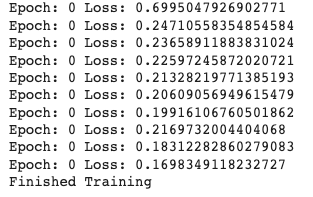


The second Neural Network has 64 input features and 1 output feature, with three Dense layers.
We are using the Binary Cross Entropy Loss function to calculate the loss, and the Adam Optimizer, with a learning rate of 0.01.

Architecture for Neural Network 2:

    input layer = 231 - hidden layer 1= 512 - ReLU - hidden layer 2= 128 - ReLU - hidden layer 3 = 64 - ReLU, output layer = 1 - Sigmoid
We can see the loss value being minimized after each epoch:

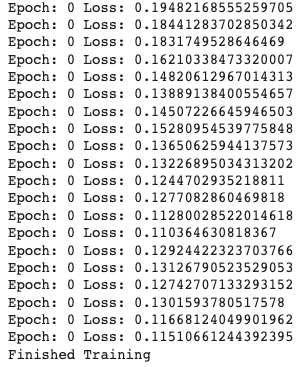

## Project Description

### Data Description:
We have been given following tables :

1. application {train|test} :
    The main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all 0.
    
2. previous_application
    Previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
    
3. bureau
    Data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
    
4. bureau_balance
    Monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
    
5. POS_cash_balance
    Monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
    
6. credit_card_balance
    Monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
    
7. install_payments
    Payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.
    
### Tasks tackled:

For this phase we examined the data flow and pipelines for any possibility of data leakage during the feature engineering and data aggregation phases.
We also implemented two Neural Networks models using PyTorch, and evaluated the performance of the models using various metrics such as Accuracy and ROC.
The final predictions were then submitted to Kaggle to get the Private and Public score.

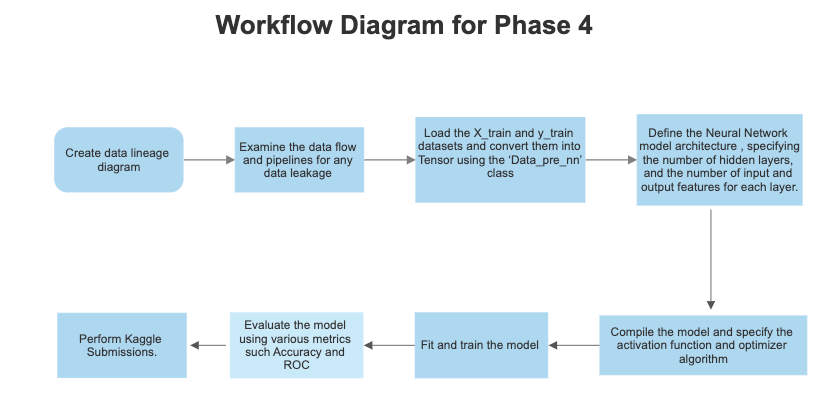



## Neural Networks:

Two neural networks were implemented in this phase:

1. Neural Network1 - It contains two dense layers, 2 relu activation layers and final dense layer which is passed to sigmoid layer

Architecture for Neural Network 1:

    input layer = 231 - hidden layer 1= 512 - ReLU - hidden layer 2 = 128 - ReLU - output layer = 1 - Sigmoid
In the below screenshot we see the loss getting minimized during each epoch.

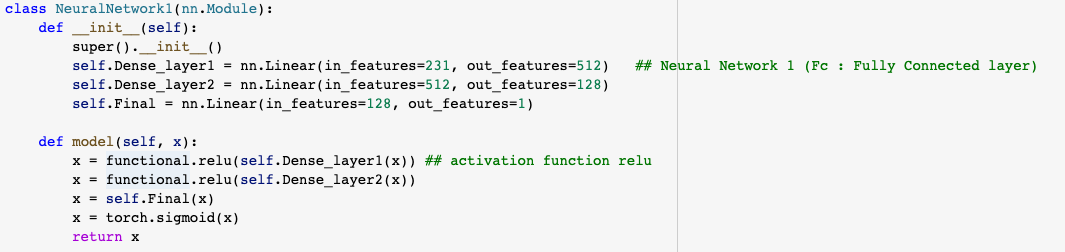
 
 
2. Neural Network2 - It contains three dense layers, 3 relu activation layers and final dense layer which is passed to sigmoid layer

Architecture for Neural Network 2:

    input layer = 231 - hidden layer 1= 512 - ReLU - hidden layer 2= 128 - ReLU - hidden layer 3 = 64 - ReLU, output layer = 1 - Sigmoid

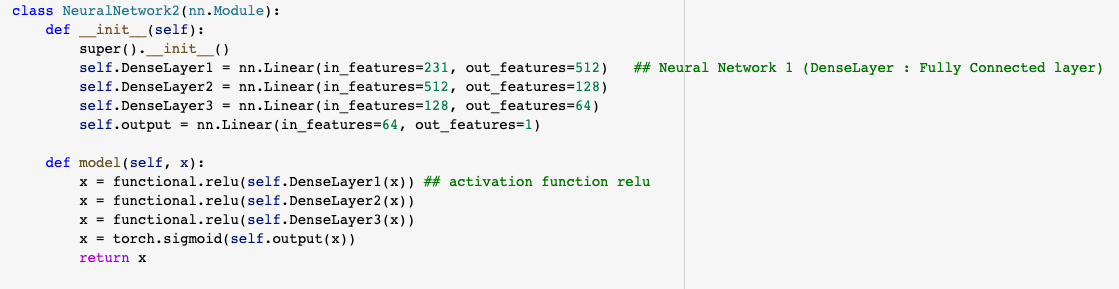

Both networks were trained for 20 epochs with a batch size of 256. 

Loss Function : Binary Cross Entropy
Optimizer : Adam

We got an accuracy of 92.45% and auc roc score of 56.98% with neural network 2
We got an accuracy of 93% and auc roc score of 71.49% with neural network 2


## Leakage:


Data leakage occurs when the training set contains information that we are going to predict.

Steps taken to avoid data leakage:

1) Leakage can occur if we standardize the entire dataset, since the training dataset will now have the knowledge of the distribution of the test data as well. Hence to avoid this, we have performed operations such as standardization , calculating min, max and range features for  the train and test set separately.

2) We have used separate pipelines for the processing and feature engineering of the Train and Test datasets.


3) One of the best ways to avoid leakage is to create a validation set , and keep it held out till we have completed creating the final model. Hence , we have maintained a separate validation set during creation and testing of the model, and performed a final stability check on the validation set.




## Modelling Pipelines:

Two new features namely count and AverageAppAmt were engineered from the previous applications table and added to the primary table using the unique key SK_ID_CURR

The feature Aggregator pipeline is used in phase-2 is now empowered with two new functions Drop Missing Values and Drop Collinear  Features to deal with features with missing values and features with high degree of collinearity

Numerical pipeline is used to select and standardize(Simple Imputer with strategy as 'mean') the numerical features used for the model.

Categorical pipeline is used to select the categorical features  and ONE HOT ENCODE and deal with missing values (Simple Imputer with strategy as 'most frequent')

Data pipeline is used to combine the output of  numerical and categorical pipelines (Feature union pipeline).

The data is then converted to tensor. We have used dataloader library of pytorch to create the train, test and validation loader to pass to the neural network.

The modified pipeline schematic with neural network is shown as under:

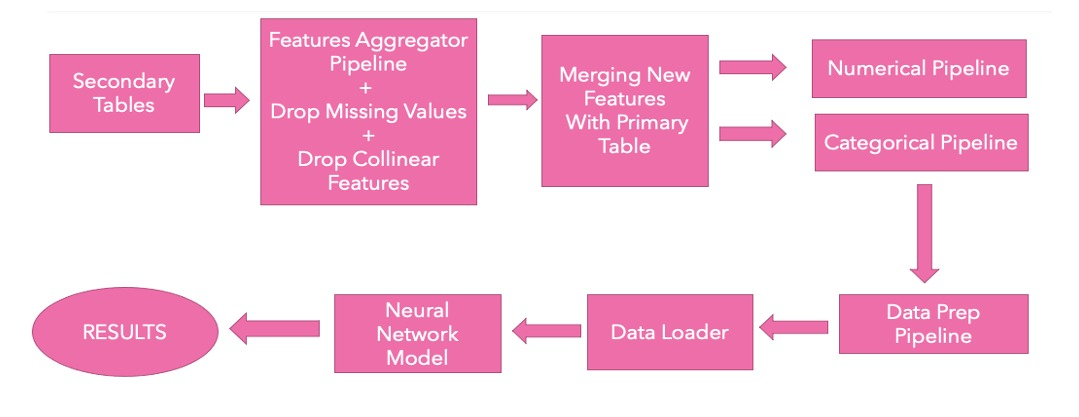


## Data Lineage:

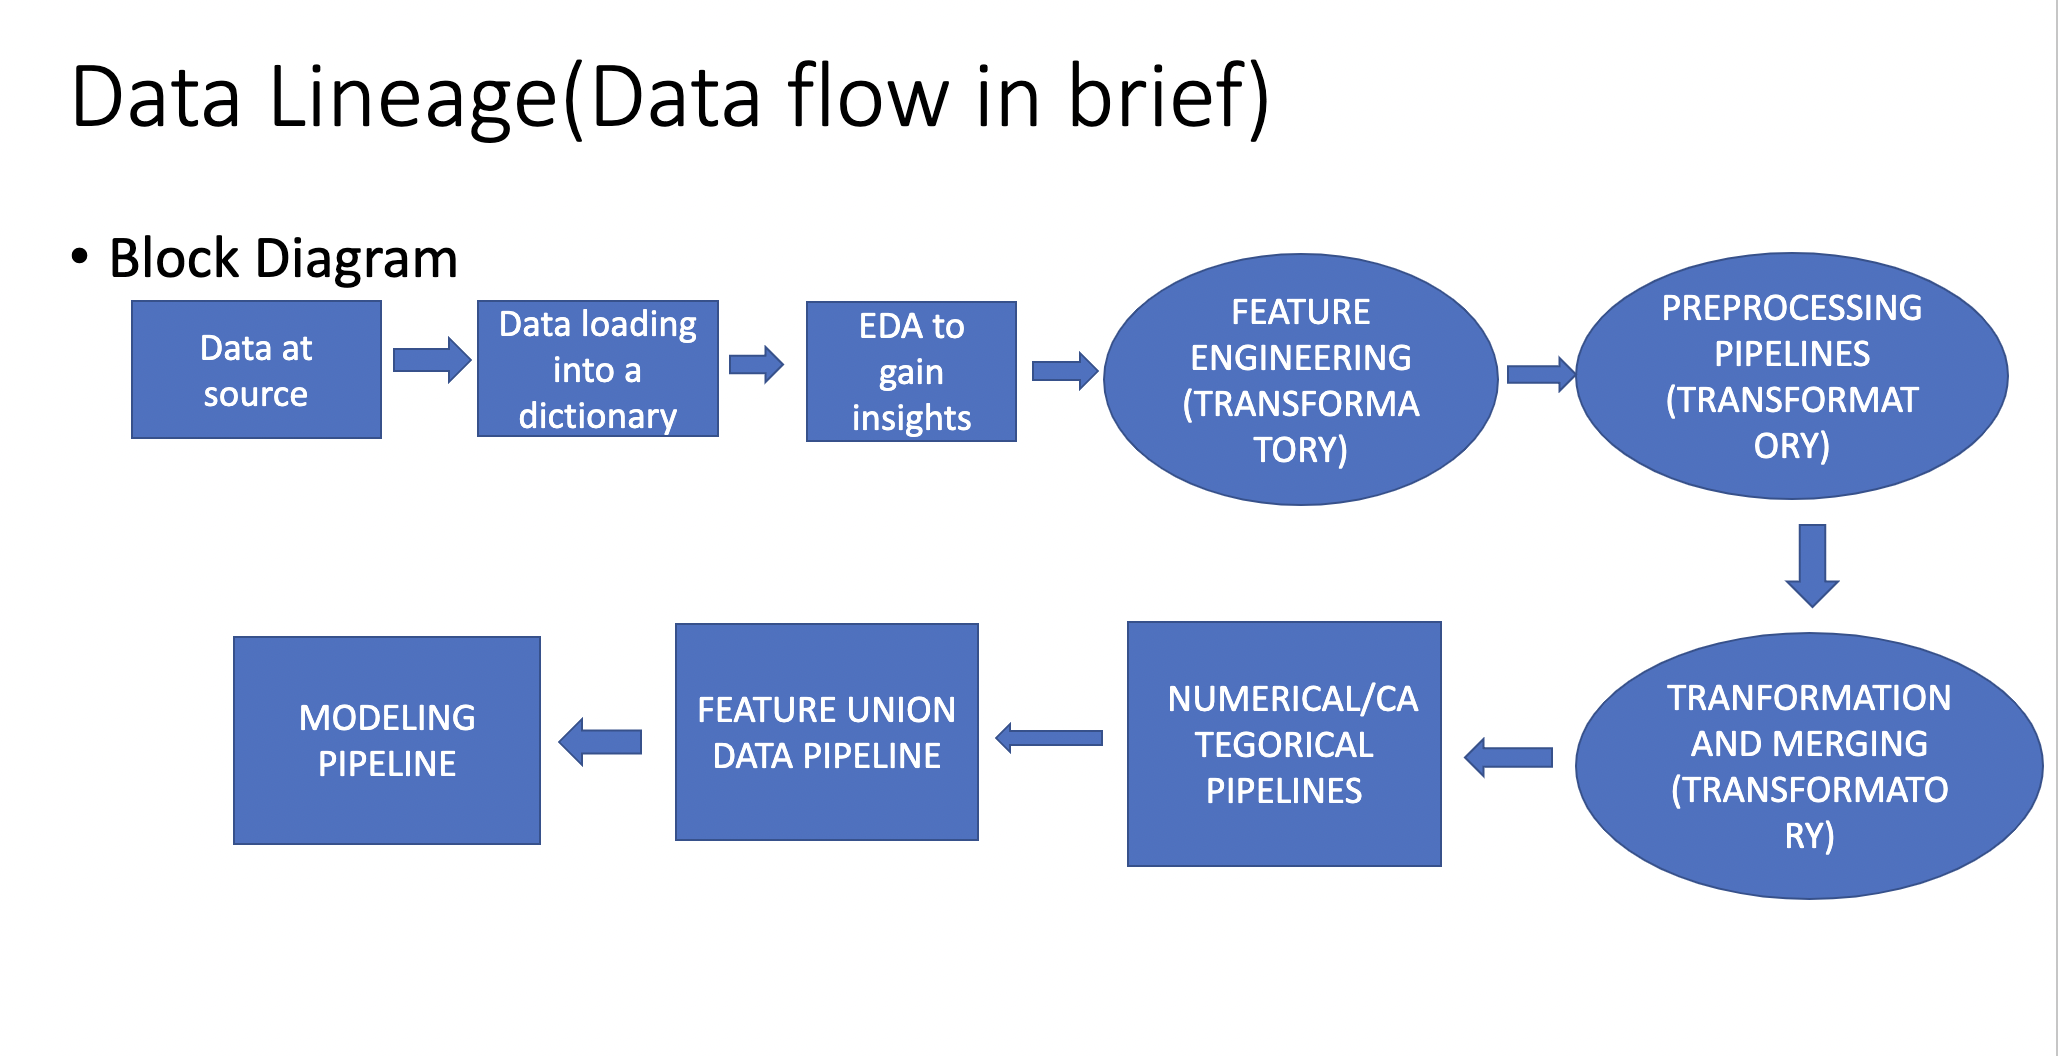

The data was initially downloaded from kaggle website which was made open by the home credit group in an attempt to make better predictions while classifying a user as a potential defaulter/non-defaulter based on non-conventional user data.​

The downloaded data was in .csv files that has train and test data seperately, along with other secondary tables such as previous applications table, bureau balance table etc.​

1) Loading of Data: The data was then loaded into a variable named datasets (a dictionary) that has the table names as it's keys and the table content as it's associated values.​

2) Exploratory Data Analysis: A lot of EDA was done on the loaded dictionary 'datasets'  to understand and analyse the source data and its numerous features. Most of the features has lot of missing values and some of the features are highly correlated with each other .​

3) Feature Engineering: Two new features namely, 'Count' , that specifies the number of previous applications of a current applicant with a unique 'SK_ID_CURR' and  'AverageAppAmt' , that specifies the average amount of loan applied by an applicant in his/her previous applications are added to the prevappcounts dataframe.​

4) Pre-processing Pipelines: The data with new features is then passed through Feature aggregator pipelines that aggregate the features from secondary tables and also deals with features with missing values by dropping the features with missing values over a specified threshold and features with high collinearity by dropping one of the highly correlated features and retaining the other. ​

5) Transformation and merging  : The pipelines are then used to transform the secondary table dataframes using the .fit_transform method and then merged with the primary data by using .merge method along with relevant primary key .​

6) Numerical and Categorical pipelines: The relevant numerical and categorical features are passed through their respective pipelines ​

7) Feature Union Data Pipeline: The relevant numerical and categorical features after being passed through their respective pipelines are then passed through a Feature union data pipeline which combines the two.​

8) Modelling pipeline: The data pipeline so achieved above, is then passed as input to a model pipeline that uses selected model to train upon the preprocessed, feature engineered data and predicts output on the held-out test data and accuracy is measured on different models.​

## Loss formulae of different models used :

Binomial logistic regression model (log loss) :


$-\frac{1}{m}\sum_{i=1}^{m}(y_{i}log(p_{i}) + (1-y_{i})log(1-p_{i}))$


Maximum Likelihood Estimate:



$\hat{\theta}{MLE} = \operatorname*{arg min} -\sum{i=1}^{m}log(y_{i}|x_{i},{\theta})$


Decision Trees (minimising Gini impurity):

$Gini = 1 - \sum_{i=1}^{c} p_{i}^{2}$


## Experimental results

### Phase 2 :

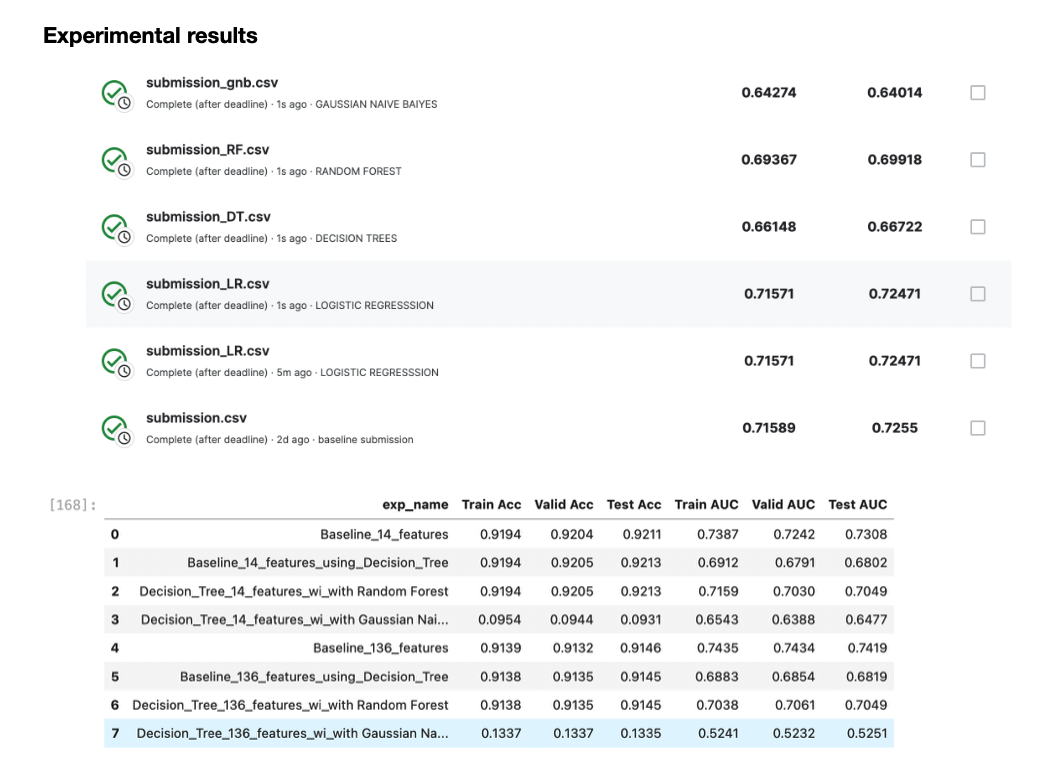

### Phase 3:

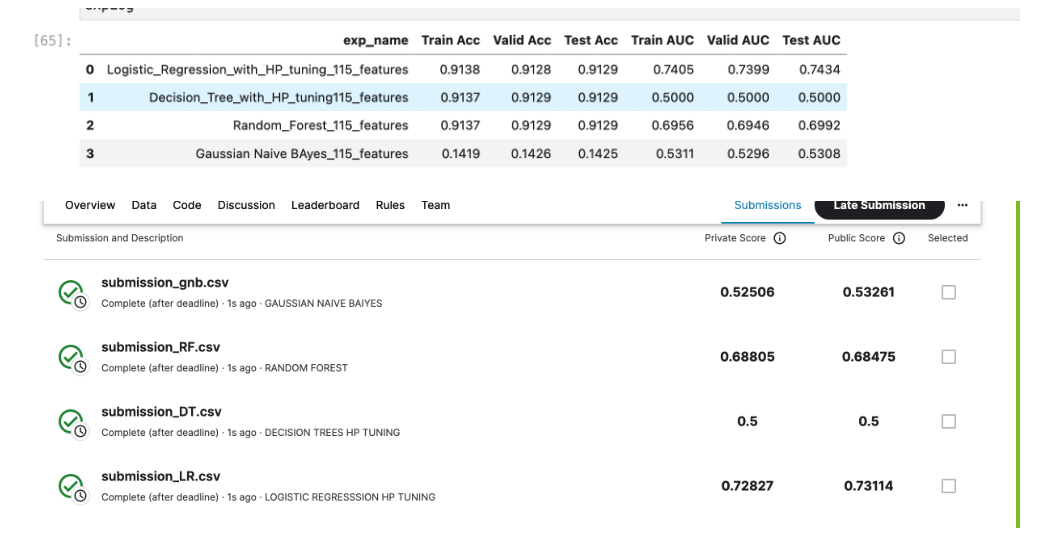


### Phase 4: 

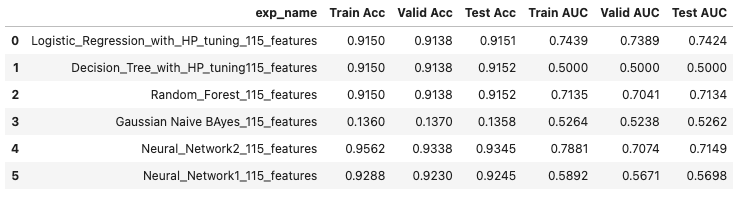


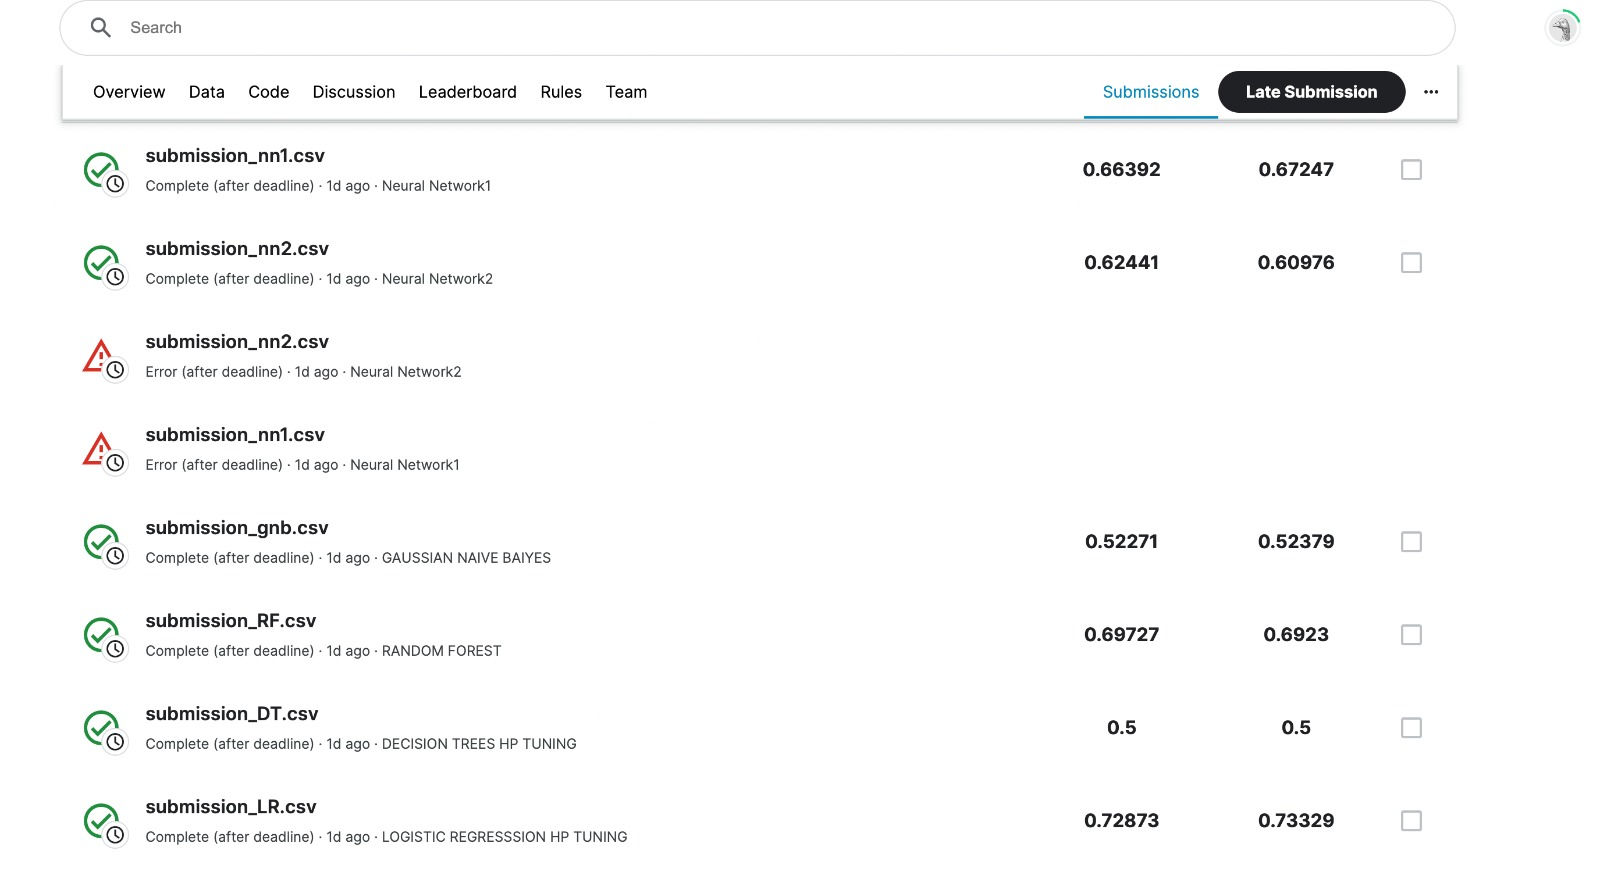

## Discussion

In the previous phases we did the following things:

1. We first tried baseline model with logistic regression with just 13 features and got  an roc auc score of 73%

2. We further created mean, max and min for some features using feature aggregator and trianed a logistic regression   model with  136 selected features and got an roc auc score of 74%

3. We have also trained models using Decision Trees, Random Forest and Gaussian Naive Bayes which did not yield good results compared to the logistic regression with 136 features.

4. We have done some feature engineering and came up with two new features and dropped features with missing values and features with high collinearity and then trained the data on logistic regression and tuned the hyper parameters. The best tuned model turned out to be : Logistic regression with C: 1 and penalty : l2 . This model got test auc score of 74.34%

For this phase, we have done the following:

1. We implemented two neural networks but the accuracy didn't change much. 
2. The highest auc score we acheived from Logistic Regression which was 0.7424
3. Neural network 2 showed an auc roc score of 0.7149
4. We might to able to increase it more if the Neural network is trained further.
5. Random Forest is also seen to give an comparable auc roc score of 0.7134.

## Conclusion

Main focus of the project is to fairly classify the loan applicants based on the alternate/non-conventional data available to minimize the degree of unfair rejections to people with insufficient credit histories so that they do not fall prey to loan sharks that charge exorbitant interest rates. 

Hypothesis :  Since the task at hand is a classification problem, and large amount of data about the users is readily available, we can experiment with  various machine learning models that train on the modified data (data preprocessing along with feature engineering) which can rightly classify with a reasonable degree of accuracy.

We have started out by training the baseline logistic regression model with 14 features and achieved test AUC of 0.7308. We have also trained Decision tree, Random forest models which achieved test AUC of 0.68 and 0.70 respectively.

In a later phase , we have used a total of 136 features to train our logistic regression model and we have got test AUC of 0.7419.

We have also engineered two new features that give out the number of previous applications and the average amount of loan applied by each applicant during those previous applications. 
 
We have also dropped features with high missing values beyond a threshold percentage and one of two features with high degree of collinearity.

Since logistic regression turned out to be our best model, we have fine tuned the hyper parameters for the same and have arrived at the following values:

Regularization term - l2 (Ridge regression ) and C =1

In the final phase, we have also implemented neural network models which were also giving comparable  accuracies. We have used adam optimizer and relu activation function.

Since there is always scope for improvement however accurate our trained model we feel may be, use of a different set of feature combinations might give out better accuracies than the current finalized model. But since, we were short on resources due to huge volume of the data set which is causing frequent kernel crashes, given the time and enough resources, we can always arrive at a better model than the current one.

## Kaggle Submission




In [6]:

! kaggle competitions submit -c home-credit-default-risk -f /root/shared/phase_4_kaggle/submission_LR.csv -m "LOGISTIC REGRESSSION HP TUNING"
! kaggle competitions submit -c home-credit-default-risk -f /root/shared/phase_4_kaggle/submission_DT.csv -m "DECISION TREES HP TUNING"
! kaggle competitions submit -c home-credit-default-risk -f /root/shared/phase_4_kaggle/submission_RF.csv -m "RANDOM FOREST"
! kaggle competitions submit -c home-credit-default-risk -f /root/shared/phase_4_kaggle/submission_gnb.csv -m "GAUSSIAN NAIVE BAIYES"
! kaggle competitions submit -c home-credit-default-risk -f /root/shared/phase_4_kaggle/submission_nn1.csv -m "Neural Network1"
! kaggle competitions submit -c home-credit-default-risk -f /root/shared/phase_4_kaggle/submission_nn2.csv -m "Neural Network2"

100%|██████████████████████████████████████| 1.28M/1.28M [00:00<00:00, 1.41MB/s]
Successfully submitted to Home Credit Default Risk